<a href="https://colab.research.google.com/github/JI411/Decoder_hack_EVRAZ/blob/develop_colab/scr/evraz_08_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-марки-стали-в-наборе-данных" data-toc-modified-id="Самые-популярные-марки-стали-в-наборе-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Самые популярные марки стали в наборе данных</a></span></li><li><span><a href="#Пропуски-нолевые-значения" data-toc-modified-id="Пропуски-нолевые-значения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски нолевые значения</a></span></li><li><span><a href="#Дисперсия" data-toc-modified-id="Дисперсия-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дисперсия</a></span></li><li><span><a href="#Выбор-необходимых-данных-для-предсказания" data-toc-modified-id="Выбор-необходимых-данных-для-предсказания-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выбор необходимых данных для предсказания</a></span></li><li><span><a href="#Выбросы-в-данных" data-toc-modified-id="Выбросы-в-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выбросы в данных</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#Проверка-предсказания-на-случайных-данных" data-toc-modified-id="Проверка-предсказания-на-случайных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка предсказания на случайных данных</a></span></li></ul></div>

In [1]:
!pip install pandas_profiling==2.7.1 
!pip install catboost
!git clone https://github.com/JI411/Decoder_hack_EVRAZ/

fatal: целевой путь «Decoder_hack_EVRAZ» уже существует и не является пустым каталогом.


In [2]:
import pandas as pd
import numpy as np
import random
import re

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## Загрузка данных

In [3]:
# data_path = '/content/Decoder_hack_EVRAZ/data' #Colab
data_path = '../data' #Local

In [4]:
df_in = pd.read_csv(data_path + '/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df = df_in
df_in.head()

nplv                   DT  МАРКА ПРОФИЛЬ t вып-обр t обработка  \
0  г6837?3<87?  2070-06-21 00:14:00  Э76ХФ     Р65      29,0  45,3666667   
1  г683863<886  2070-06-21 01:07:00  Э76ХФ     Р65      26,0  44,0666667   
2  г683863<887  2070-06-21 02:00:00  Э76ХФ     Р65      24,0       43,35   
3  г683863<888  2070-06-21 02:58:00  Э76ХФ     Р65      17,0  46,1833333   
4  г683863<889  2070-06-21 03:50:00  Э76ХФ     Р65      20,0        48,5   

  t под током  t продувка ПСН гр. чист расход C чист расход Cr чист расход Mn  \
0        24,4  41,0333333     NaN       0,45646       0,059572       0,117446   
1  13,8666667  44,0666667     NaN      0,359285       0,083738       0,160923   
2       17,95       43,35     NaN      0,331665        0,08149       0,132332   
3  19,8166667  46,1833333     NaN      0,377945       0,133194       0,221605   
4  17,0333333        48,5     NaN      0,389875       0,105094       0,169459   

  чист расход Si чист расход V температура первая температура последняя  \
0       0,104762     0,0409383             1557,0                1580,0   
1       0,110327     0,0400831             1601,0                1591,0   
2        0,13986     0,0416225             1593,0                1586,0   
3       0,165186     0,0420497             1589,0                1589,0   
4       0,143024     0,0409667             1597,0                1592,0   

  Ar (интенс.) N2 (интенс.) эл. энергия (интенс.) произв жидкая сталь  \
0   13,6067425          NaN         12809,0163934               115,5   
1     8,074721          NaN         12816,3461538               111,6   
2    13,801968          NaN         12511,4206128               115,8   
3   12,6649585          NaN         12998,1497056               116,3   
4   10,2983505          NaN         12987,4755382               115,0   

  произв количество обработок произв  количество плавок  \
0                         1,0                       1,0   
1                         1,0                       1,0   
2                         1,0                       1,0   
3                         1,0                       1,0   
4                         1,0                       1,0   

  произв количество плавок (цел) расход газ Ar расход газ  N2 расход C пров.  \
0                            1,0        18,611            NaN            NaN   
1                            1,0        11,659            NaN            NaN   
2                            1,0        19,871            NaN            NaN   
3                            1,0        19,497            NaN            NaN   
4                            1,0        16,649            NaN            NaN   

  сыпуч известь РП сыпуч кварцит сыпуч кокс пыль УСТК  \
0              NaN           NaN                 0,17   
1              NaN           NaN                0,488   
2              NaN           NaN                 0,05   
3            0,077           NaN                 0,05   
4            0,082           NaN                 0,05   

  сыпуч  кокс. мелочь (сух.) сыпуч  кокс. мелочь КМ1 сыпуч  шпат плав.  \
0                        NaN                   0,401             0,123   
1                        NaN                     NaN             0,094   
2                        NaN                   0,346             0,061   
3                        NaN                    0,39             0,059   
4                        NaN                   0,412             0,035   

  ферспл CaC2 ферспл FeMo ферспл FeSi-75 ферспл FeV азот. ферспл  FeV-80  \
0        0,02         NaN            NaN              NaN       0,051939   
1        0,02         NaN            NaN              NaN       0,050854   
2        0,02         NaN            NaN              NaN       0,052807   
3        0,02         NaN            NaN              NaN       0,053349   
4        0,02         NaN            NaN              NaN       0,051975   

  ферспл  Mn5Si65Al0.5 ферспл  Ni H1 пласт. ферспл SiMn18 ферспл  ферванит  \
0                

# Задача

EDA
выводы по качеству данных:
1. Пропуски
2. Нули
3. Дисперсия
4. Выбросы

Создать модель предсказания для столбцов:

* химшлак последний Al2O3
* химшлак последний CaO
* химшлак последний R
* химшлак последний SiO2

In [5]:
def cat_to_num(data):
  df['nplv'] = df['nplv'].apply(lambda x: ''.join([c for c in x.replace('?', '0') if c.isdigit()])).astype('int64')
  columns_float = df_in.drop(['DT', 'МАРКА', 'ПРОФИЛЬ'], axis=1).columns.values
  df[columns_float] =  df[columns_float].replace(',', '.', regex=True).astype('float64')
  return df

df_in = cat_to_num(df_in)
df_in.head()

nplv                   DT  МАРКА ПРОФИЛЬ  t вып-обр  t обработка  \
0  683703870.0  2070-06-21 00:14:00  Э76ХФ     Р65       29.0    45.366667   
1  683863886.0  2070-06-21 01:07:00  Э76ХФ     Р65       26.0    44.066667   
2  683863887.0  2070-06-21 02:00:00  Э76ХФ     Р65       24.0    43.350000   
3  683863888.0  2070-06-21 02:58:00  Э76ХФ     Р65       17.0    46.183333   
4  683863889.0  2070-06-21 03:50:00  Э76ХФ     Р65       20.0    48.500000   

   t под током  t продувка  ПСН гр.  чист расход C  чист расход Cr  \
0    24.400000   41.033333      NaN       0.456460        0.059572   
1    13.866667   44.066667      NaN       0.359285        0.083738   
2    17.950000   43.350000      NaN       0.331665        0.081490   
3    19.816667   46.183333      NaN       0.377945        0.133194   
4    17.033333   48.500000      NaN       0.389875        0.105094   

   чист расход Mn  чист расход Si  чист расход V  температура первая  \
0        0.117446        0.104762       0.040938              1557.0   
1        0.160923        0.110327       0.040083              1601.0   
2        0.132332        0.139860       0.041622              1593.0   
3        0.221605        0.165186       0.042050              1589.0   
4        0.169459        0.143024       0.040967              1597.0   

   температура последняя  Ar (интенс.)  N2 (интенс.)  эл. энергия (интенс.)  \
0                 1580.0     13.606742           NaN           12809.016393   
1                 1591.0      8.074721           NaN           12816.346154   
2                 1586.0     13.801968           NaN           12511.420613   
3                 1589.0     12.664958           NaN           12998.149706   
4                 1592.0     10.298350           NaN           12987.475538   

   произв жидкая сталь  произв количество обработок  \
0                115.5                          1.0   
1                111.6                          1.0   
2                115.8                          1.0   
3                116.3                          1.0   
4                115.0                          1.0   

   произв  количество плавок  произв количество плавок (цел)  расход газ Ar  \
0                        1.0                             1.0         18.611   
1                        1.0                             1.0         11.659   
2                        1.0                             1.0         19.871   
3                        1.0                             1.0         19.497   
4                        1.0                             1.0         16.649   

   расход газ  N2  расход C пров.  сыпуч известь РП  сыпуч кварцит  \
0             NaN             NaN               NaN            NaN   
1             NaN             NaN               NaN            NaN   
2             NaN             NaN               NaN            NaN   
3             NaN             NaN             0.077            NaN   
4             NaN             NaN             0.082            NaN   

   сыпуч кокс пыль УСТК  сыпуч  кокс. мелочь (сух.)  сыпуч  кокс. мелочь КМ1  \
0                 0.170                         NaN                    0.401   
1                 0.488                         NaN                      NaN   
2                 0.050                         NaN                    0.346   
3                 0.050                         NaN                    0.390   
4                 0.050                         NaN                    0.412   

   сыпуч  шпат плав.  ферспл CaC2  ферспл FeMo  ферспл FeSi-75  \
0              0.123         0.02          NaN             NaN   
1              0.094         0.02          NaN             NaN   
2              0.061         0.02          NaN             NaN   
3              0.059         0.02          NaN             NaN   
4              0.035         0.02          NaN             NaN   

   ферспл FeV азот.  ферспл  FeV-80  ферспл  Mn5Si65Al0.5  \
0               NaN        0.051939           

## EDA

### Самые популярные марки стали в наборе данных


In [6]:
mat_counts = df_in.МАРКА.value_counts()
print(f"Самая популярная марка стали: {mat_counts.index[0]}")
labels = mat_counts.index
values = mat_counts.values
pull = np.zeros(shape=(values.shape[0]))
pull[values.argmax()] = 0.1
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             pull=pull,
                             title='Популятность марок стали', )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    )

fig.update_traces(hoverinfo='label+percent+value', textinfo='none',
                  marker=dict(line=dict(color='#000000', width=2)))

fig.show()

Самая популярная марка стали: Э76ХФ


In [7]:
# df_in = df_in[df_in['МАРКА'] == 'Э76ХФ']           <--- не надо ли так сделать?

### Пропуски, нулевые значения

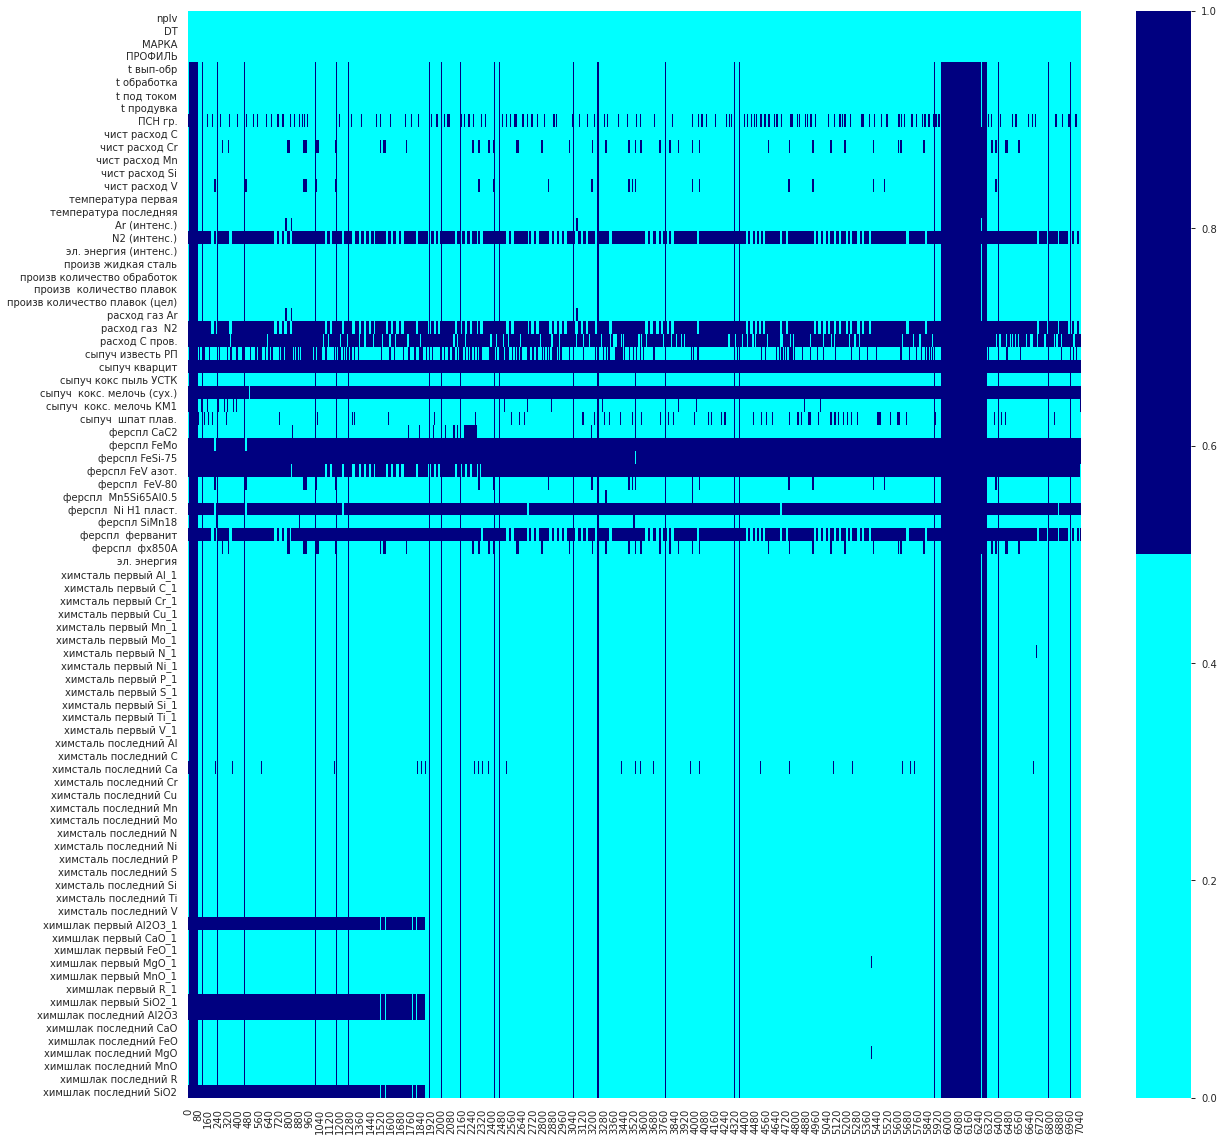

In [8]:
# Распределение пропусков в наборе данных

f, ax = plt.subplots(figsize=(20, 20))
cols = df_in.columns# колонки для проверки
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#00FFFF', '#000080']
sns.heatmap(df_in[cols].transpose().isnull(),
            cmap=sns.color_palette(colours)
            )
plt.show()

В наборе данны присутвуют практические не заполненные строки их предлогаю удалить

In [9]:
# Удаление данных с пустыми строками
def drop_nan_rows(df):
    return df[~
            df[df.columns[
                ~df.columns.isin([
                    'nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ'
                ])
                ]
              ].isna().transpose().min()]
# Пример пустых строк
df_in[~df_in.index.isin(drop_nan_rows(df_in).index)].head()

nplv                   DT  МАРКА ПРОФИЛЬ  t вып-обр  t обработка  \
6    68386388.0  2070-06-21 05:53:00  Э76ХФ     Р65        NaN          NaN   
7    68386388.0  2070-06-21 08:25:00  Э76ХФ     Р65        NaN          NaN   
8    68386388.0  2070-06-21 09:23:00  Э76ХФ     Р65        NaN          NaN   
9    68386388.0  2070-06-21 10:17:00  Э76ХФ     Р65        NaN          NaN   
10  683863880.0  2070-06-21 11:53:00  Э76ХФ     Р65        NaN          NaN   

    t под током  t продувка  ПСН гр.  чист расход C  чист расход Cr  \
6           NaN         NaN      NaN            NaN             NaN   
7           NaN         NaN      NaN            NaN             NaN   
8           NaN         NaN      NaN            NaN             NaN   
9           NaN         NaN      NaN            NaN             NaN   
10          NaN         NaN      NaN            NaN             NaN   

    чист расход Mn  чист расход Si  чист расход V  температура первая  \
6              NaN             NaN            NaN                 NaN   
7              NaN             NaN            NaN                 NaN   
8              NaN             NaN            NaN                 NaN   
9              NaN             NaN            NaN                 NaN   
10             NaN             NaN            NaN                 NaN   

    температура последняя  Ar (интенс.)  N2 (интенс.)  эл. энергия (интенс.)  \
6                     NaN           NaN           NaN                    NaN   
7                     NaN           NaN           NaN                    NaN   
8                     NaN           NaN           NaN                    NaN   
9                     NaN           NaN           NaN                    NaN   
10                    NaN           NaN           NaN                    NaN   

    произв жидкая сталь  произв количество обработок  \
6                   NaN                          NaN   
7                   NaN                          NaN   
8                   NaN                          NaN   
9                   NaN                          NaN   
10                  NaN                          NaN   

    произв  количество плавок  произв количество плавок (цел)  расход газ Ar  \
6                         NaN                             NaN            NaN   
7                         NaN                             NaN            NaN   
8                         NaN                             NaN            NaN   
9                         NaN                             NaN            NaN   
10                        NaN                             NaN            NaN   

    расход газ  N2  расход C пров.  сыпуч известь РП  сыпуч кварцит  \
6              NaN             NaN               NaN            NaN   
7              NaN             NaN               NaN            NaN   
8              NaN             NaN               NaN            NaN   
9              NaN             NaN               NaN            NaN   
10             NaN             NaN               NaN            NaN   

    сыпуч кокс пыль УСТК  сыпуч  кокс. мелочь (сух.)  сыпуч  кокс. мелочь КМ1  \
6                    NaN                         NaN                      NaN   
7                    NaN                         NaN                      NaN   
8                    NaN                         NaN                      NaN   
9                    NaN                         NaN                      NaN   
10                   NaN                         NaN                      NaN   

    сыпуч  шпат плав.  ферспл CaC2  ферспл FeMo  ферспл FeSi-75  \
6                 NaN          NaN          NaN             NaN   
7                 NaN          NaN          NaN             NaN   
8                 NaN          NaN          NaN             NaN   
9                 NaN          NaN          NaN             NaN   
10                NaN          NaN          NaN             NaN   

    ферспл FeV азот.  ферспл  FeV-80  ферспл  Mn5Si65A

## Среднии значения и квантили

In [10]:
df_in.describe().transpose().sort_values('50%')

count          mean           std  \
химсталь последний Ca           6218.0  3.191348e-04  2.496444e-04   
химсталь первый Al_1            6444.0  1.782123e-03  4.911289e-04   
химсталь первый Ti_1            6444.0  1.661856e-03  5.638200e-04   
химсталь последний Ti           6444.0  2.902235e-03  5.370645e-04   
химсталь первый V_1             6444.0  2.770019e-03  2.796118e-03   
химсталь последний Al           6444.0  3.181719e-03  1.303787e-03   
химсталь последний Mo           6444.0  6.254500e-03  2.312489e-03   
химсталь первый Mo_1            6443.0  7.048735e-03  2.109568e-03   
химсталь первый P_1             6444.0  9.107697e-03  2.040459e-03   
химсталь последний P            6444.0  1.005788e-02  2.068867e-03   
химсталь первый N_1             6443.0  9.971131e-03  1.510937e-03   
химсталь последний N            6442.0  1.244582e-02  2.244889e-03   
химсталь последний S            6444.0  1.501412e-02  2.715541e-03   
расход C пров.                   724.0  2.086168e-02  1.374750e-02   
ферспл FeMo                       33.0  1.942930e-02  1.874073e-03   
ферспл CaC2                     6244.0  2.008648e-02  1.429271e-03   
химсталь первый S_1             6444.0  2.001878e-02  3.427272e-03   
сыпуч кварцит                     13.0  2.000000e-02  0.000000e+00   
ферспл FeV азот.                 383.0  2.384514e-02  1.093506e-03   
ферспл  ферванит                1017.0  2.662402e-02  8.243882e-03   
химсталь последний V            6444.0  4.544584e-02  2.079223e-02   
чист расход V                   6178.0  5.136576e-02  2.212567e-02   
ферспл  Ni H1 пласт.              82.0  3.986929e-02  1.276781e-02   
сыпуч  шпат плав.               5910.0  5.472961e-02  2.379861e-02   
сыпуч кокс пыль УСТК            6422.0  6.670648e-02  8.149390e-02   
ферспл FeSi-75                     5.0  4.400000e-02  1.341641e-02   
ферспл  FeV-80                  6179.0  6.136827e-02  2.188673e-02   
химсталь первый Ni_1            6444.0  7.099845e-02  1.199336e-02   
химсталь последний Ni           6444.0  7.151738e-02  1.432380e-02   
химсталь первый Cu_1            6444.0  1.019992e-01  1.317993e-02   
химсталь последний Cu           6444.0  1.016896e-01  1.303266e-02   
химшлак последний MnO           6444.0  1.237942e-01  6.458710e-02   
сыпуч известь РП                4770.0  1.321788e-01  7.976306e-02   
чист расход Cr                  5883.0  1.176922e-01  3.158860e-02   
чист расход Si                  6431.0  1.305610e-01  4.126849e-02   
чист расход Mn                  6431.0  1.390683e-01  5.280679e-02   
ферспл  Mn5Si65Al0.5            6400.0  1.434364e-01  5.561281e-02   
химшлак первый MnO_1            6444.0  2.293746e-01  3.092289e-01   
ферспл  фх850А                  5883.0  2.080389e-01  5.608974e-02   
ферспл SiMn18                   6398.0  2.155399e-01  8.139949e-02   
химсталь первый Cr_1            6444.0  2.732890e-01  7.858349e-02   
чист расход C                   6435.0  4.030879e-01  9.119685e-02   
химсталь последний Cr           6444.0  3.634890e-01  1.039462e-01   
сыпуч  кокс. мелочь КМ1         6307.0  4.201620e-01  1.130754e-01   
сыпуч  кокс. мелочь (сух.)         7.0  3.857143e-01  1.235445e-01   
химсталь первый Si_1            6444.0  4.258956e-01  7.690555e-02   
химсталь первый C_1             6444.0  4.661620e-01  6.341599e-02   
химсталь последний Si           6444.0  5.371710e-01  7.533651e-02   
химшлак последний FeO           6444.0  5.857232e-01  2.169185e-01   
химшлак первый FeO_1            6444.0  7.057263e-01  7.118581e-01   
химсталь первый Mn_1            6444.0  6.722767e-01  6.309940e-02   
химсталь последний C            6444.0  7.815711e-01  4.622239e-02   
химсталь последний Mn           6444.0  7.944415e-01  5.402314e-02   
произв количество плавок (цел)  6444.0  1.000000e+00  0.000000e+00   
произв количество обработок     6444.0  1.009001e+00  1.023380e-01   
произв  количество плавок       6444.0  1.000000e+00  0.000000e+00   
химшлак последний R             6444.0  2.3

### Дисперсия

In [11]:
# Разделяем X и y
y_columns = ['химшлак последний Al2O3', 
             'химшлак последний CaO',
             'химшлак последний R',
             'химшлак последний SiO2']

X_columns = [col for col in df.columns if col not in y_columns]
# print(X_columns)

<AxesSubplot:>

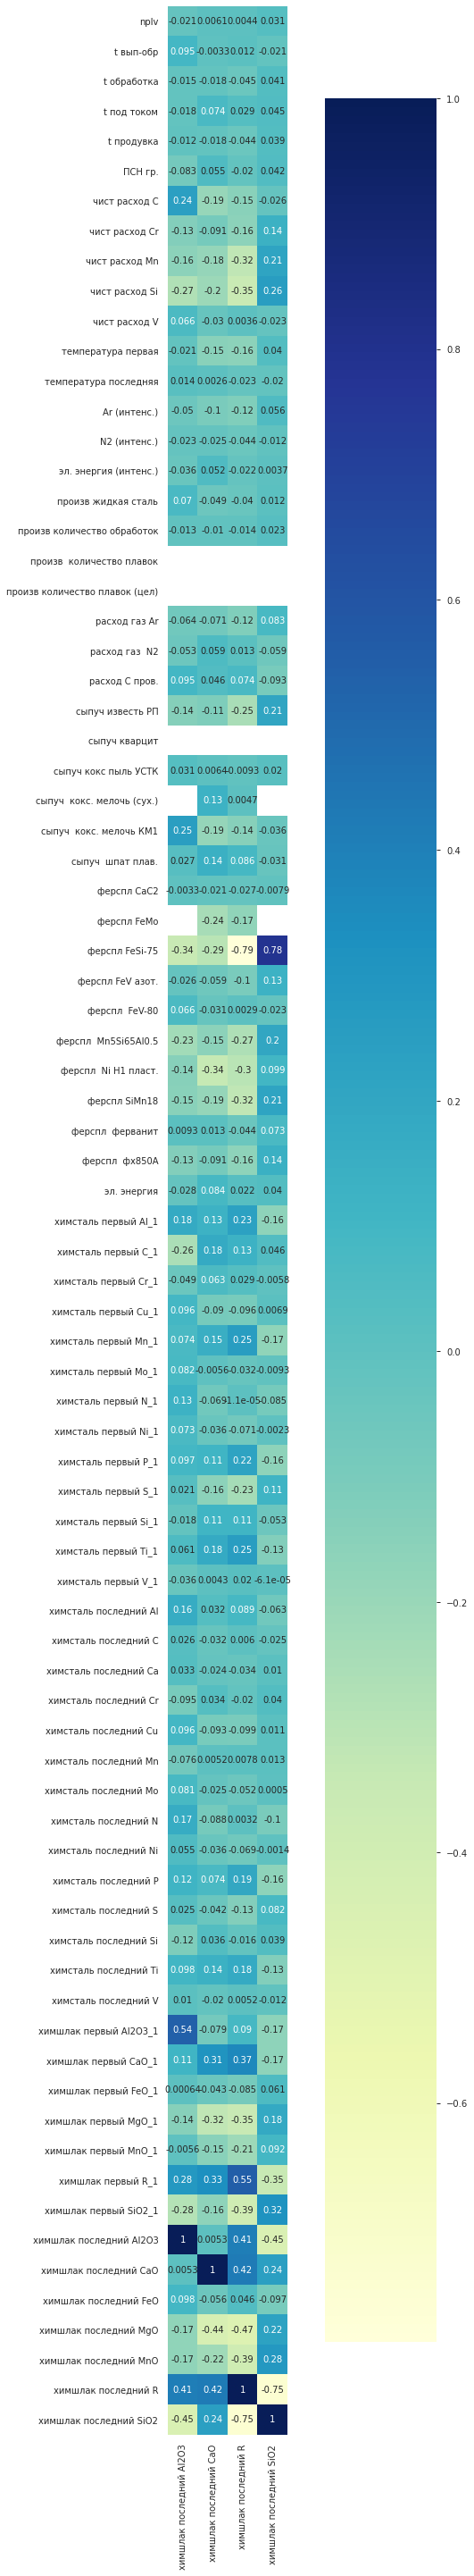

In [12]:
#Простое изучение степени линейной зависимости целевых данных отностельно остальных
corrmat = df_in.corr()
f, ax = plt.subplots(figsize=(15, 50))
sns.heatmap(corrmat[y_columns], 
                        annot=True,
                        square=True,
                        cmap= 'YlGnBu')

In [13]:
high_corr = []
for col in corrmat.columns.values:
  for target in y_columns:
    if corrmat.loc[(target, col)] > 0.3 and col not in ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']:
      high_corr.append([target, col])
high_corr.sort()
high_corr

[['химшлак последний Al2O3', 'химшлак первый Al2O3_1'],
 ['химшлак последний CaO', 'химшлак первый CaO_1'],
 ['химшлак последний CaO', 'химшлак первый R_1'],
 ['химшлак последний R', 'химшлак первый CaO_1'],
 ['химшлак последний R', 'химшлак первый R_1'],
 ['химшлак последний SiO2', 'ферспл FeSi-75'],
 ['химшлак последний SiO2', 'химшлак первый SiO2_1']]

Из этого представления видно: что наиболее полезные для предсказания данные:

    ([['химшлак последний Al2O3', 'химшлак первый Al2O3_1'],
     ['химшлак последний CaO', 'химшлак первый CaO_1'],
     ['химшлак последний CaO', 'химшлак первый R_1'],
     ['химшлак последний R', 'химшлак первый CaO_1'],
     ['химшлак последний R', 'химшлак первый R_1'],
     ['химшлак последний SiO2', 'ферспл FeSi-75'],
     ['химшлак последний SiO2', 'химшлак первый SiO2_1']])

### Выбросы в данных

In [14]:
X_float_columns = df_in[X_columns].dtypes[df_in[X_columns].dtypes == 'float64'].index.values

In [15]:
graf_path = data_path + '/render_graf'

# Подготовка данных для построения графика
def get_reg_info_df(df_in, x_col, y_columns):
    info_col = []
    info_col = y_columns.copy()
    info_col.append(x_col)
    df_info = pd.DataFrame()
    for col in y_columns:
        df_ = df_in[[col,x_col]]
        df_[col] = df_[col] / df_[col].max() # приведение в проценты
        df_.columns = ['values',x_col]
        df_['Y'] = col
        df_info = pd.concat([df_info, df_])
    return df_info


def plot_reg_info(df_info, quantile):     
#     plt.figure()
    graph = sns.lmplot(x = 'values',
           y = x_col,
           hue="Y",
           col="Y",
           data=df_info,
           height=4, scatter_kws={"s": 7}
          )
    graph.map(plt.axhline, y=quantile, ls="--", color='red')
    graph.set_axis_labels("Y",x_col)
    graph.savefig(graf_path + f"/Y_to_{x_col}.png")


## Задаем порог обрезки больших значений X

In [16]:
quantile_emissions_dict = {}
# Квантиль в отчете от максимального значения для обрезки верхних выбрасов X в %
threshold = 0.2 # %
threshold = 1 - threshold/100

In [17]:
# Построение графиков
# for x_col in X_float_columns:
# # for x_col in ['химшлак первый Al2O3_1']:
#     df_info = get_reg_info_df(df_in, x_col, y_columns)
#     quantile = df_info[x_col].quantile(threshold)
#     quantile_emissions_dict[x_col] = quantile
#     plot_reg_info(df_info, quantile)


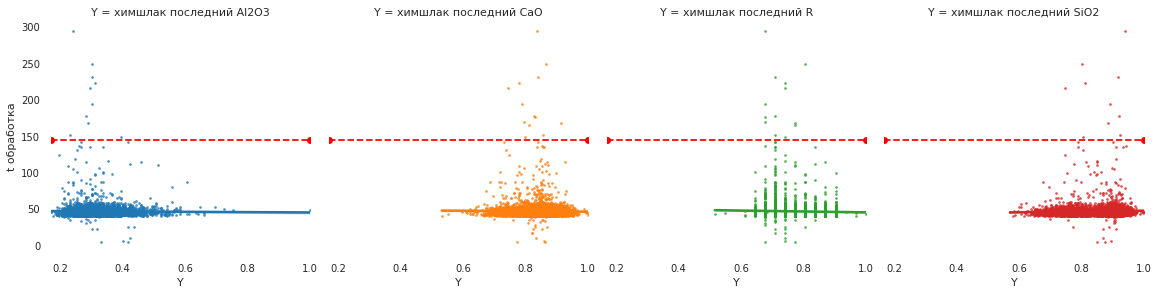

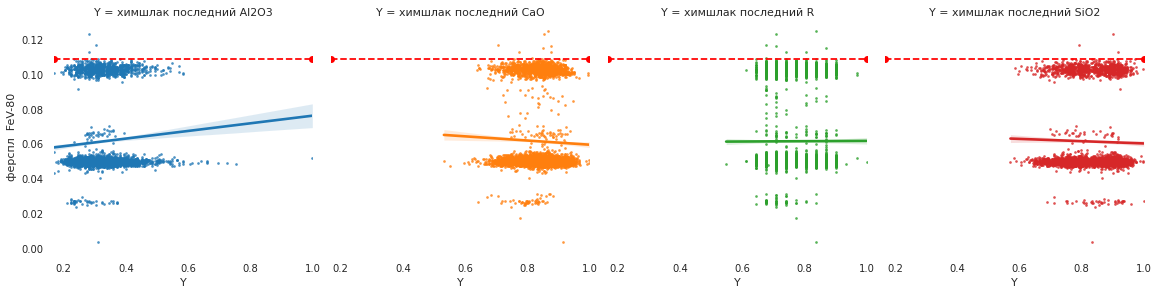

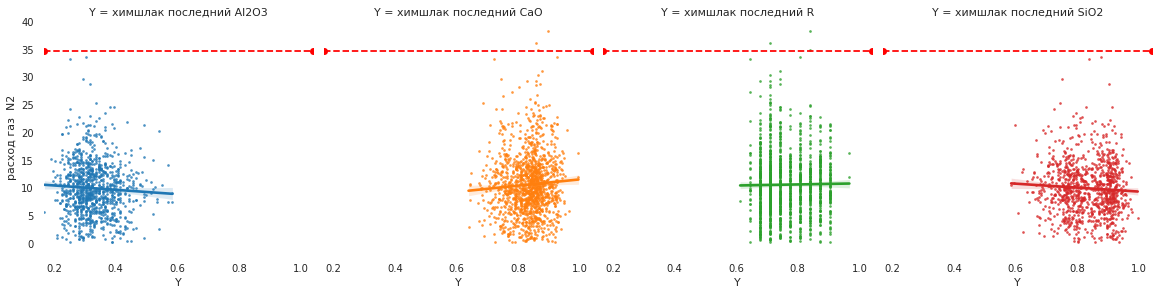

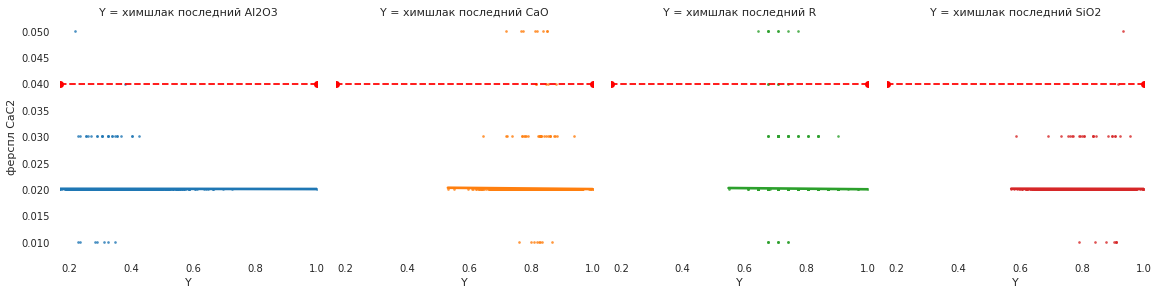

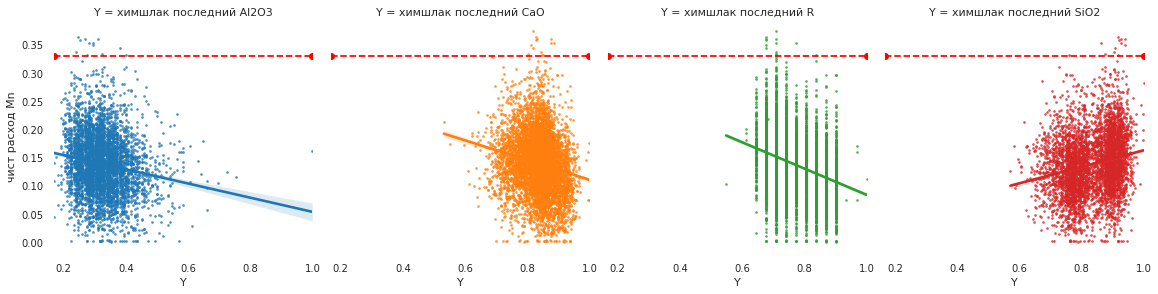

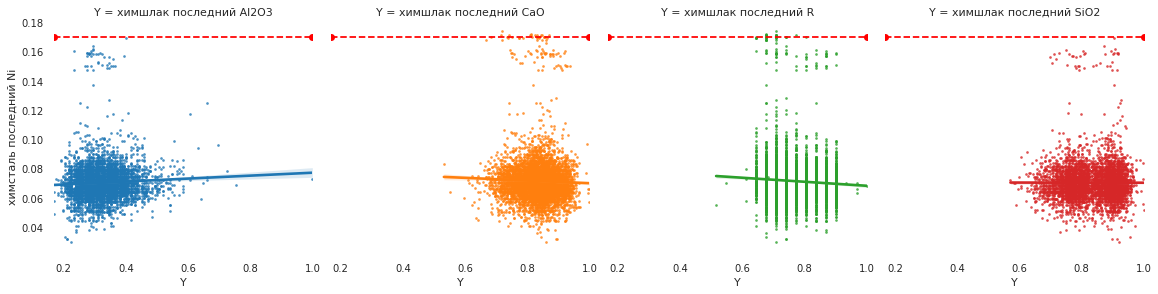

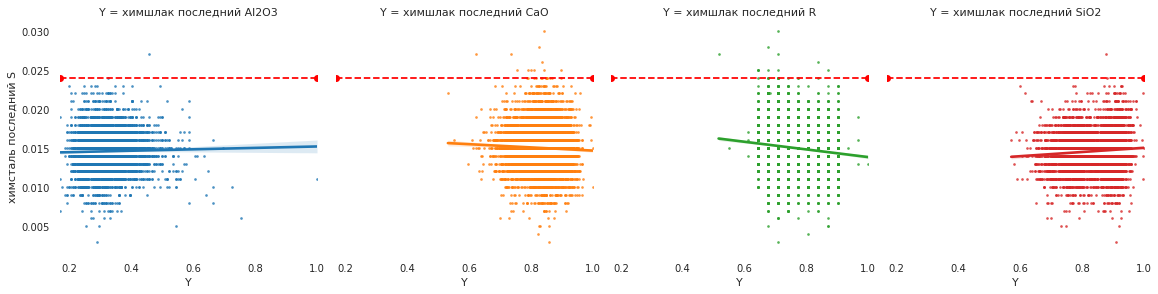

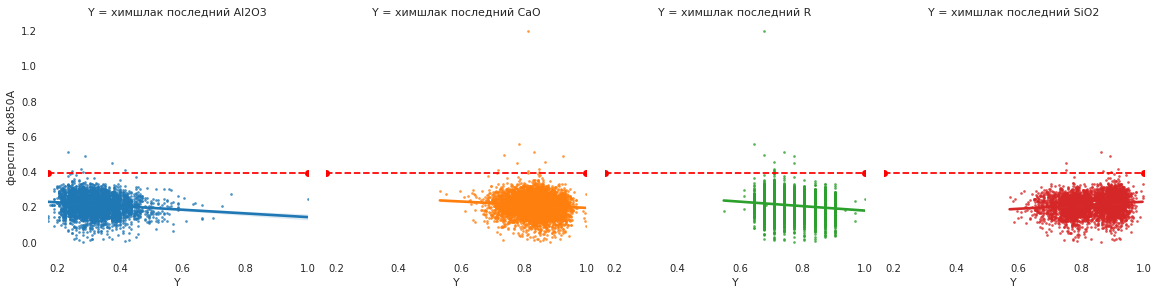

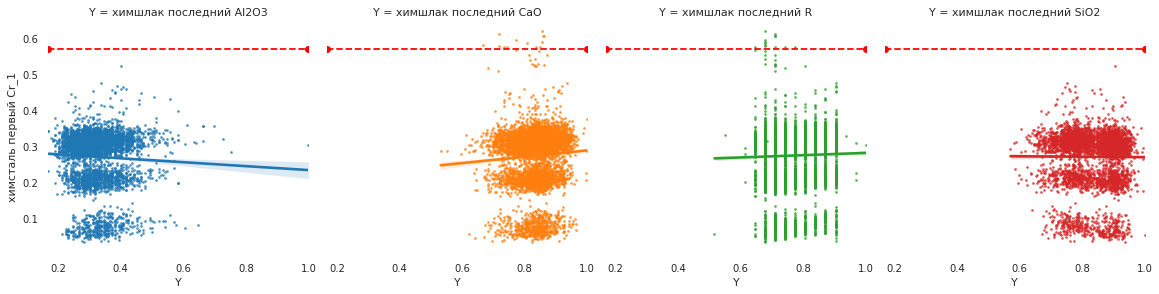

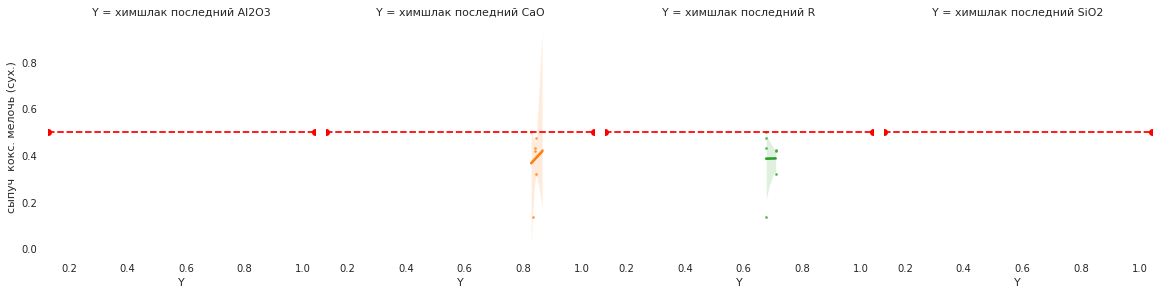

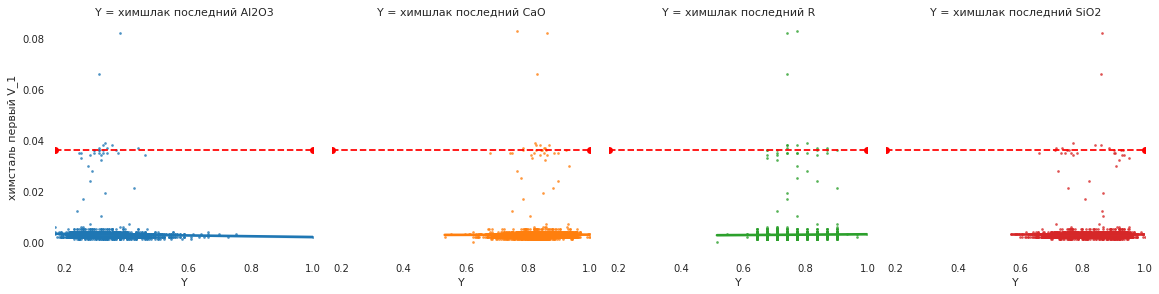

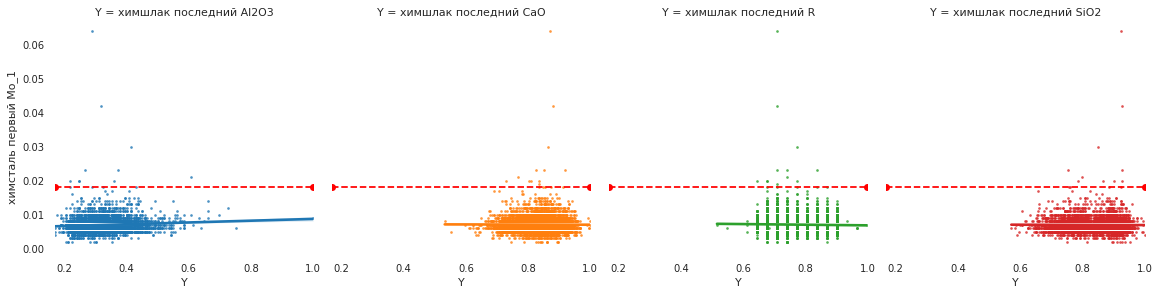

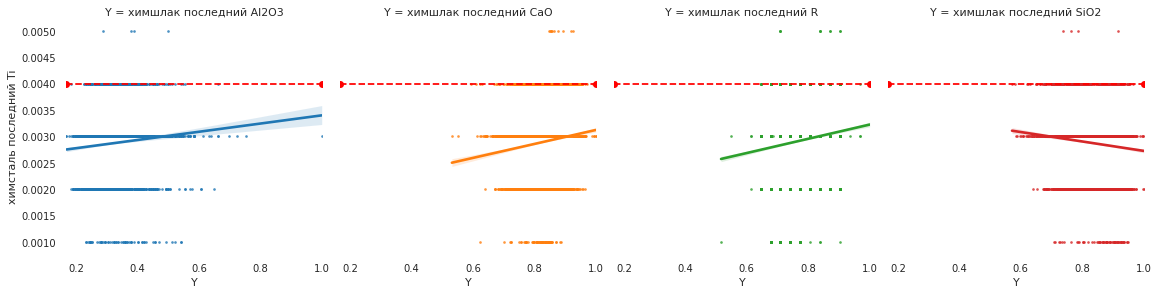

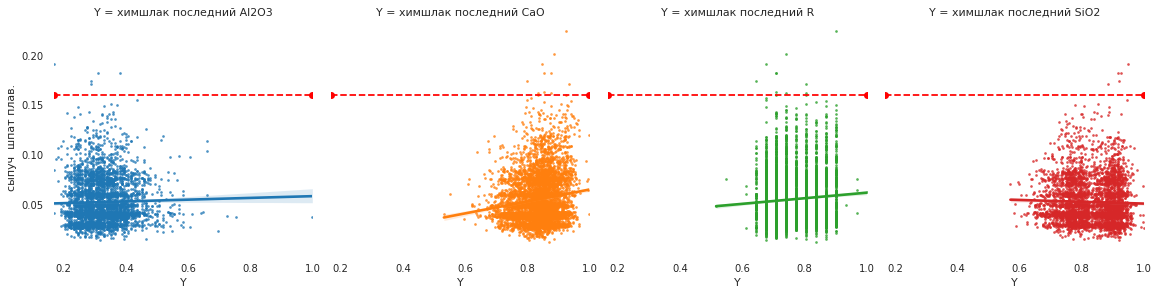

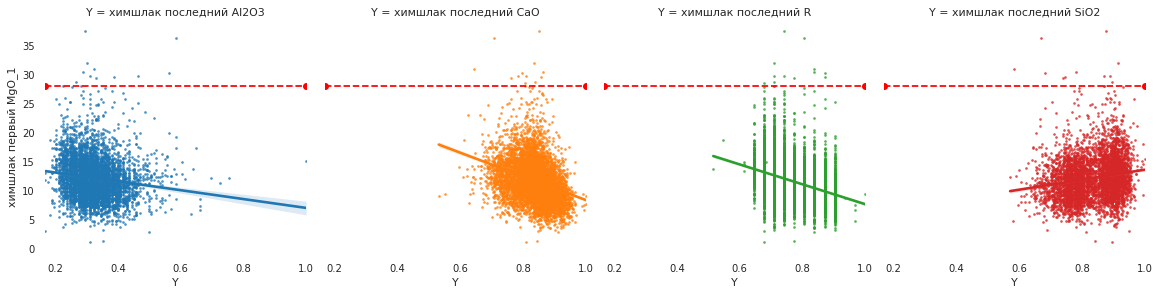

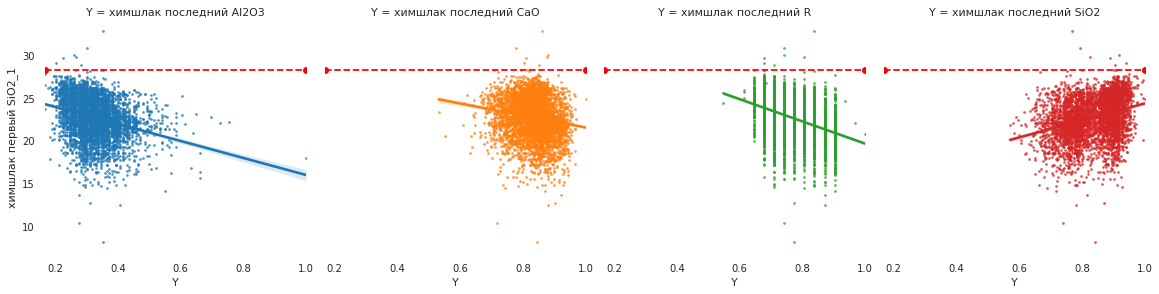

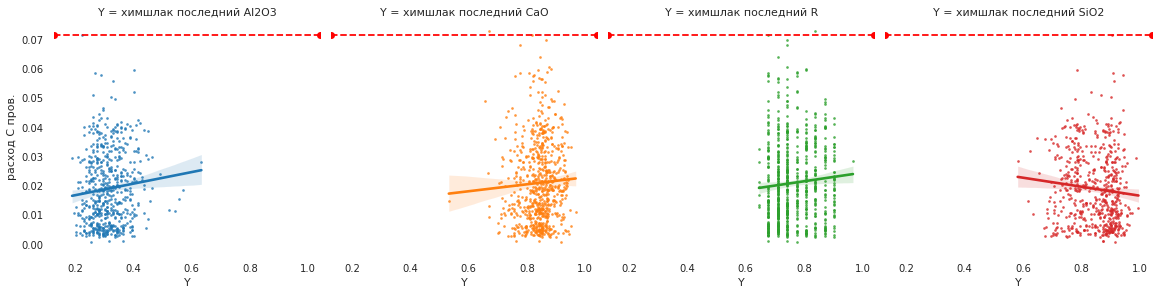

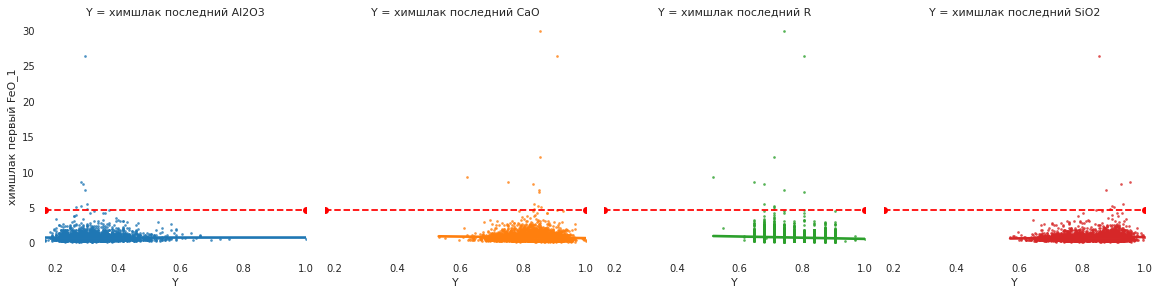

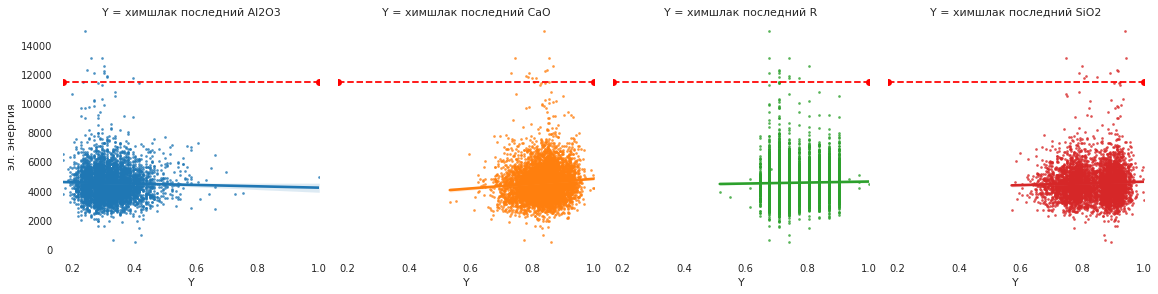

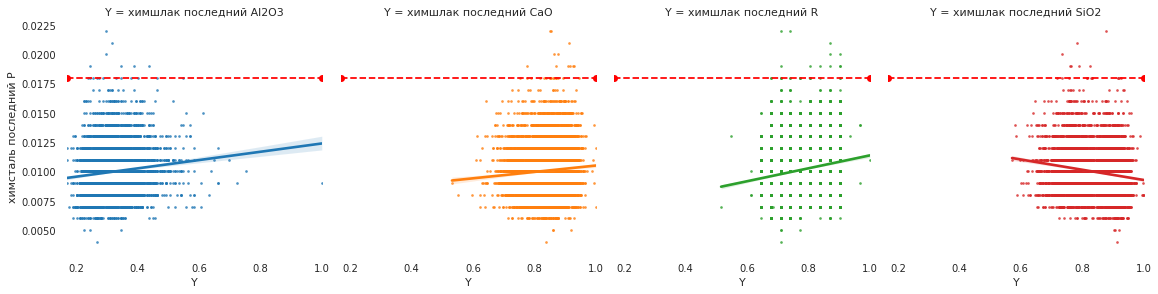

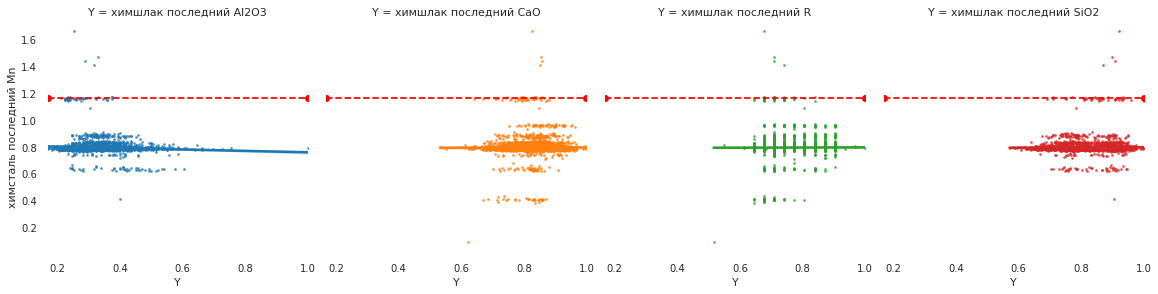

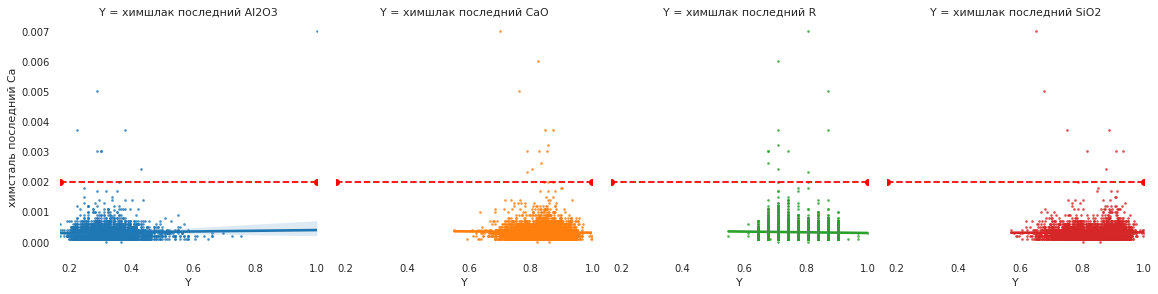

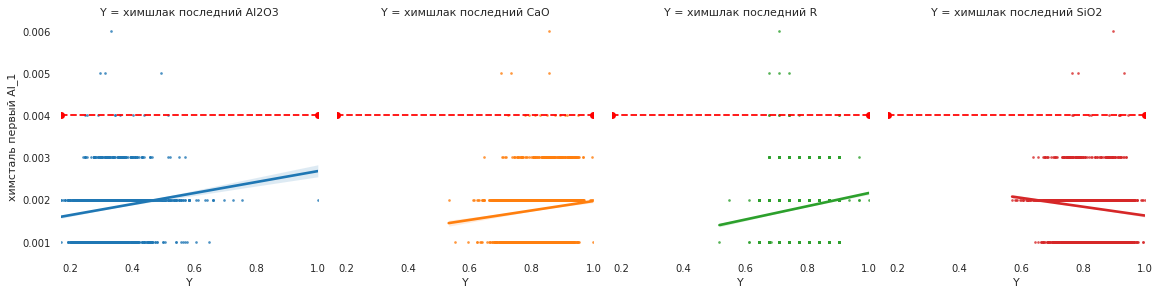

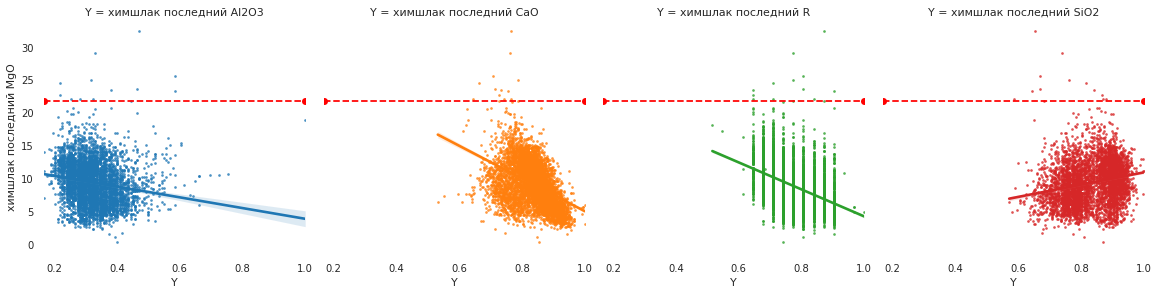

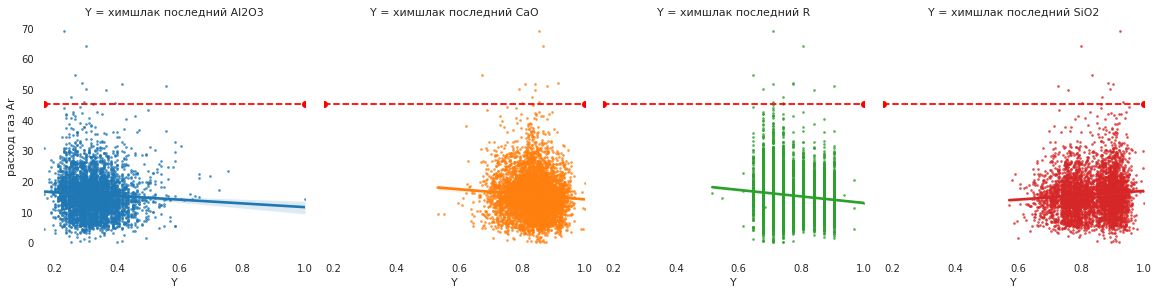

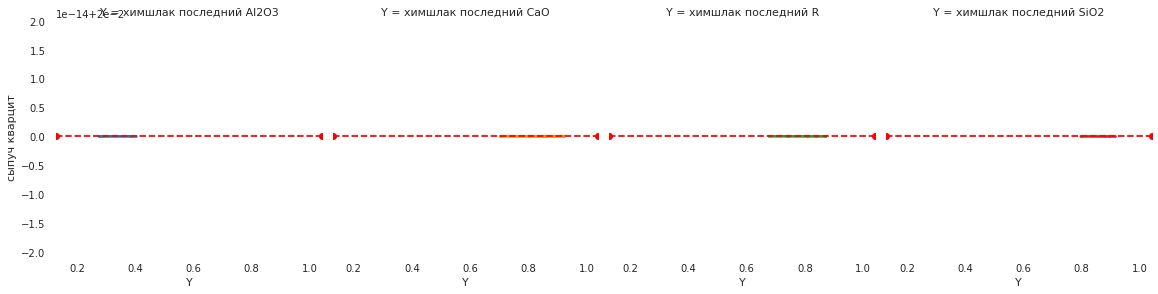

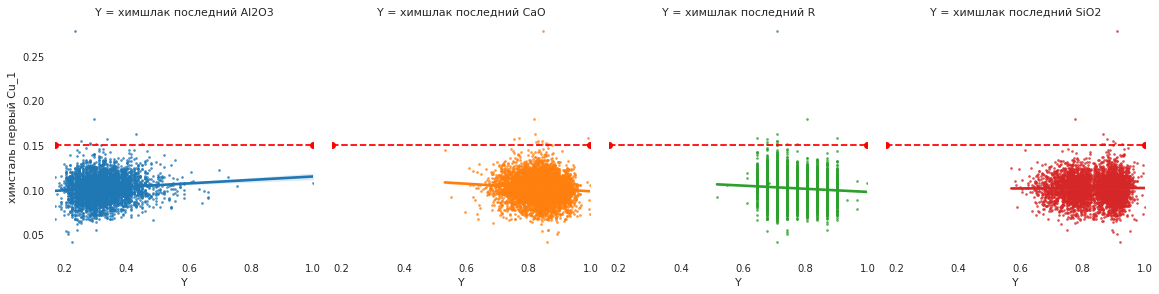

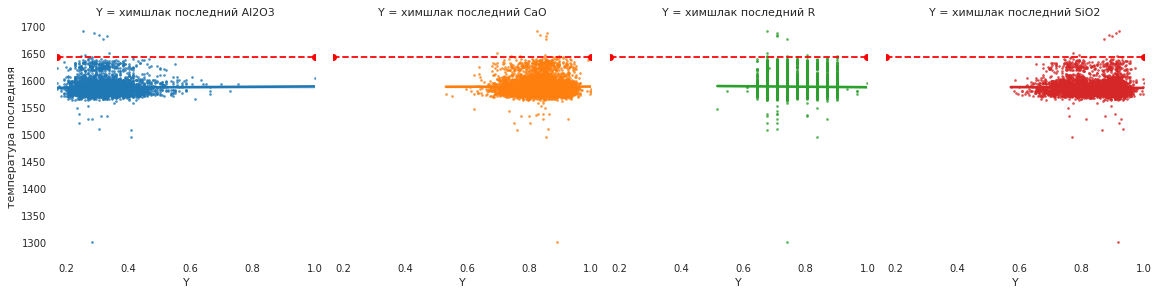

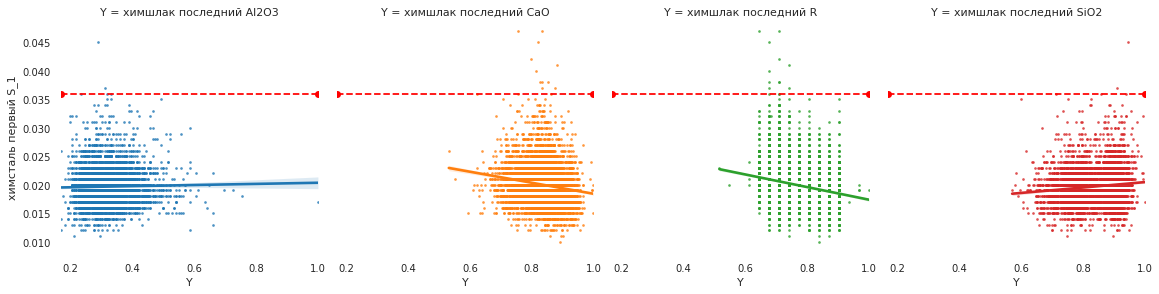

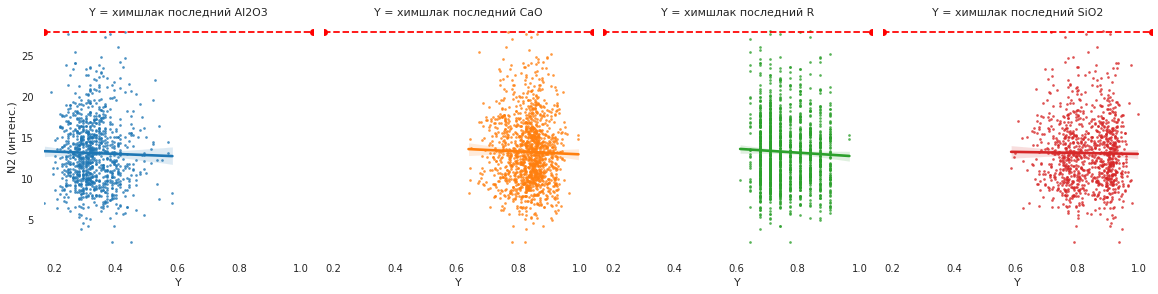

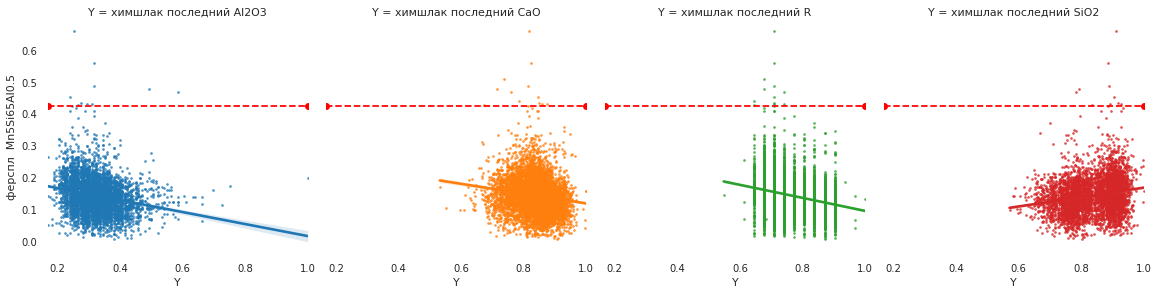

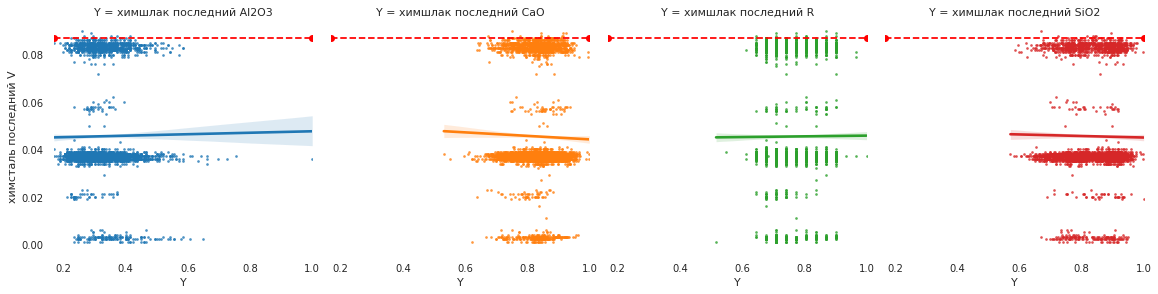

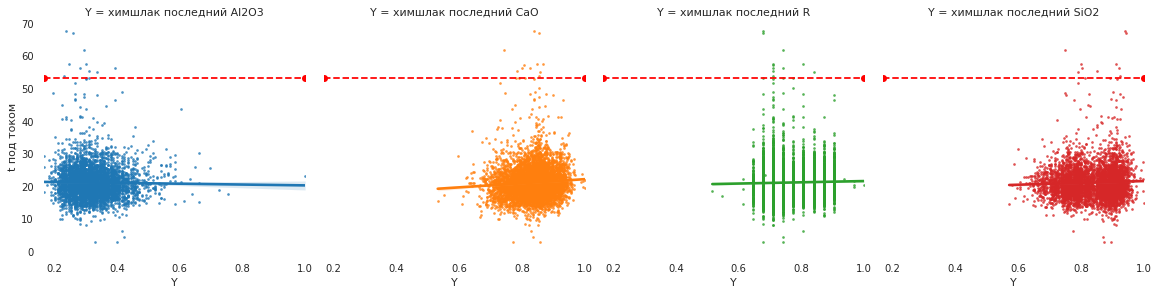

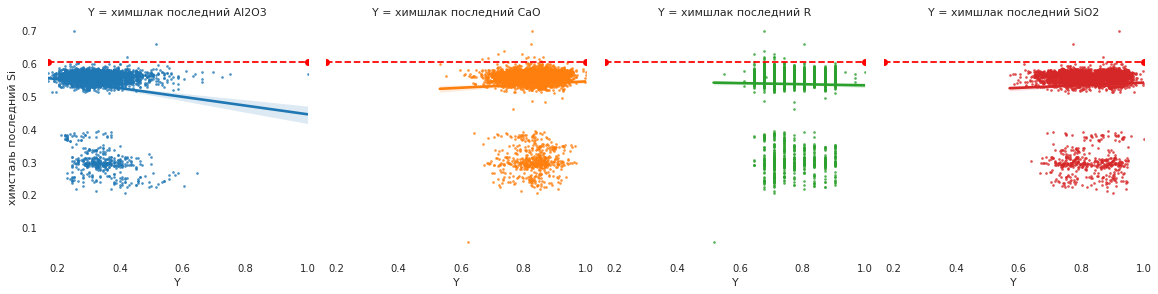

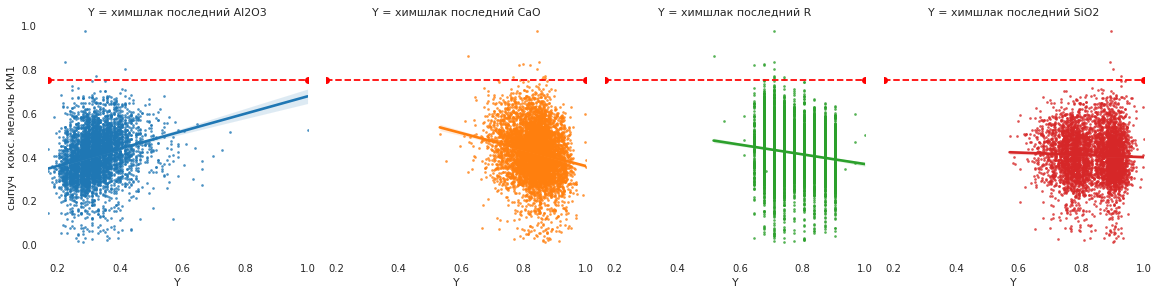

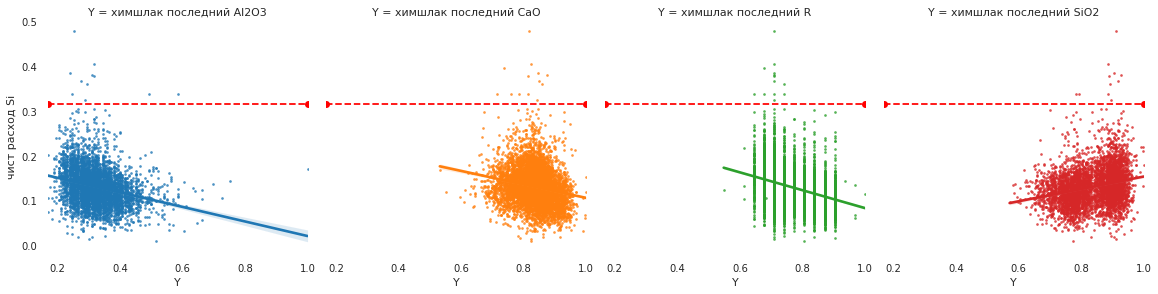

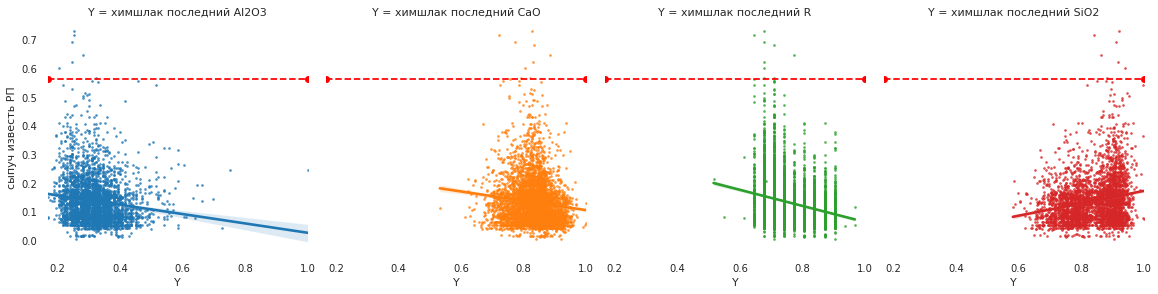

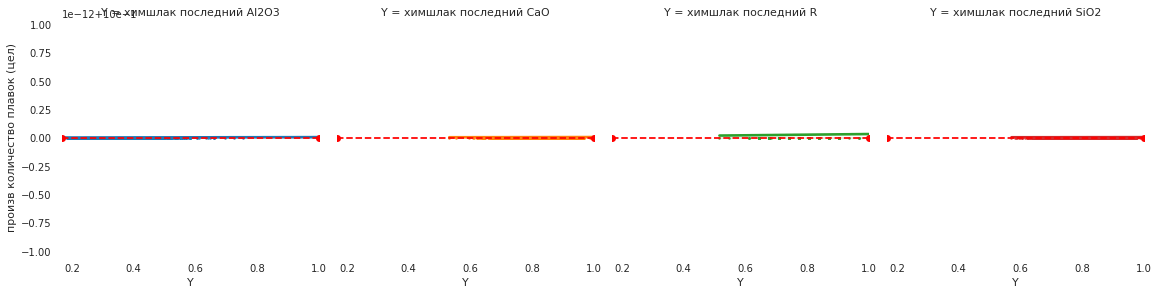

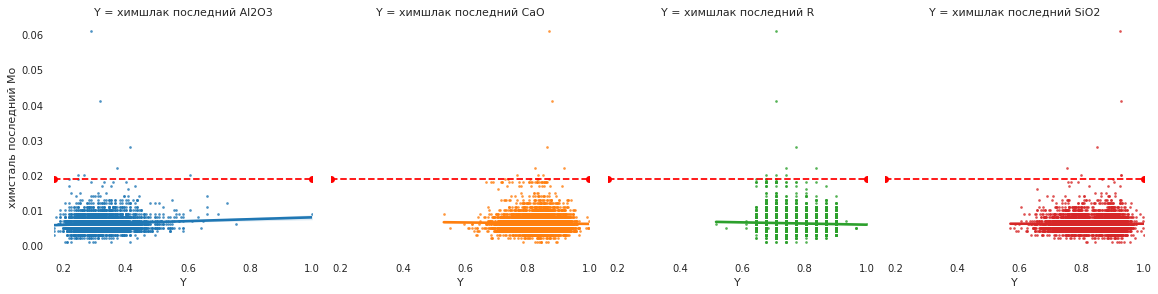

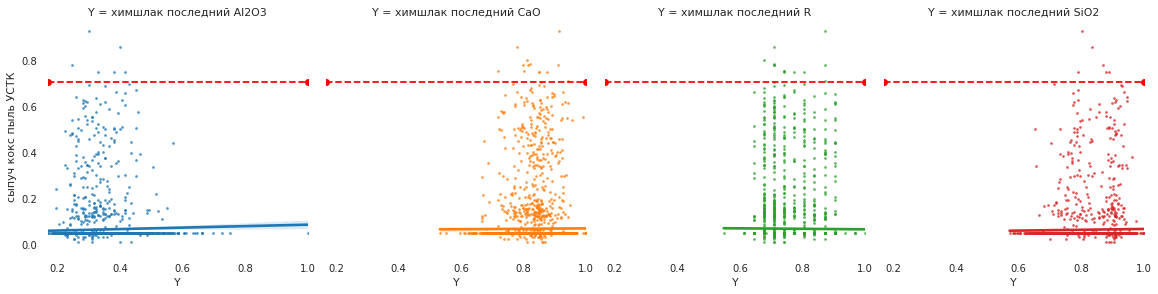

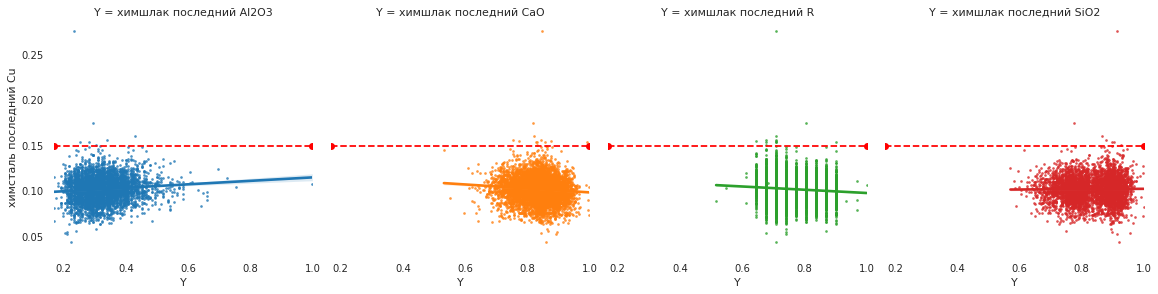

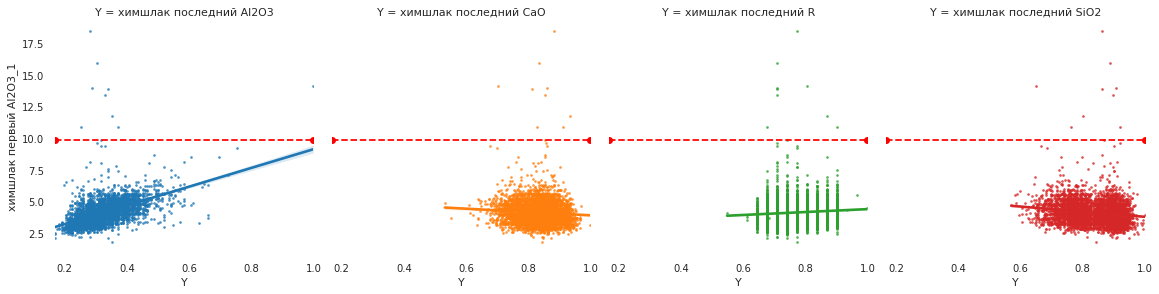

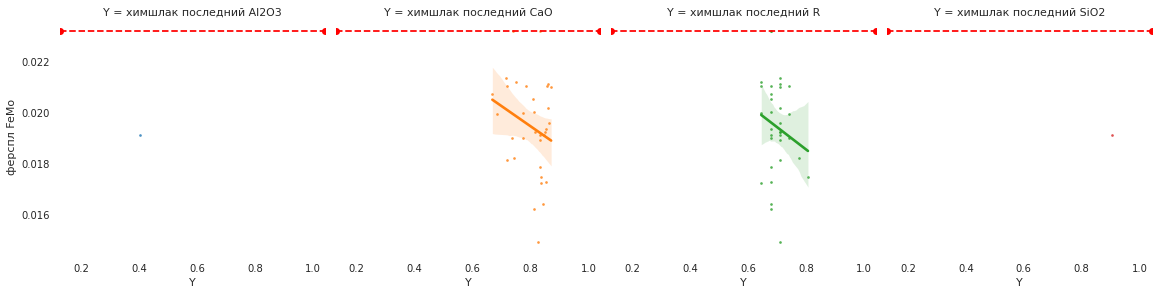

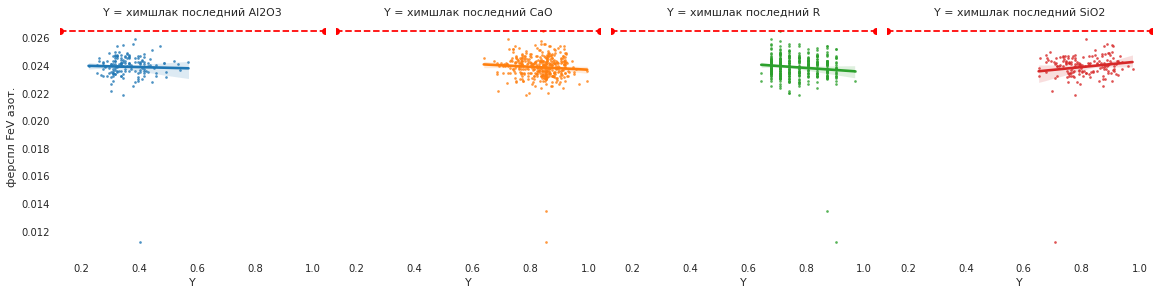

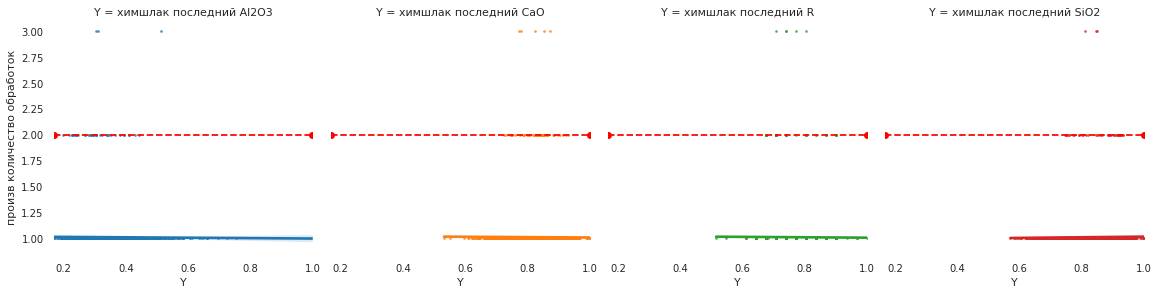

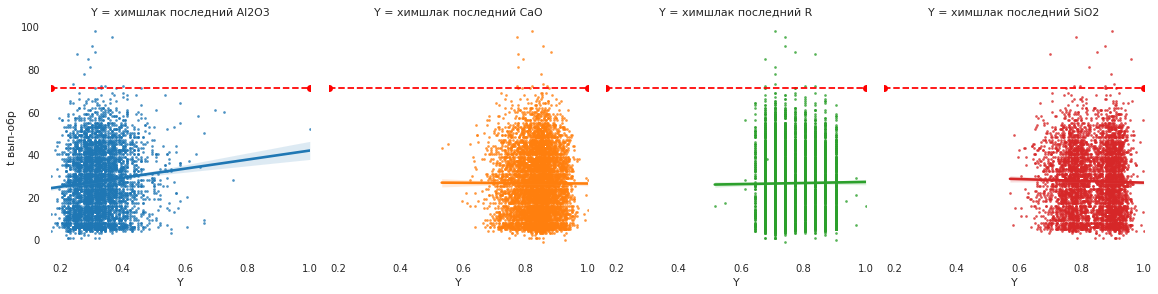

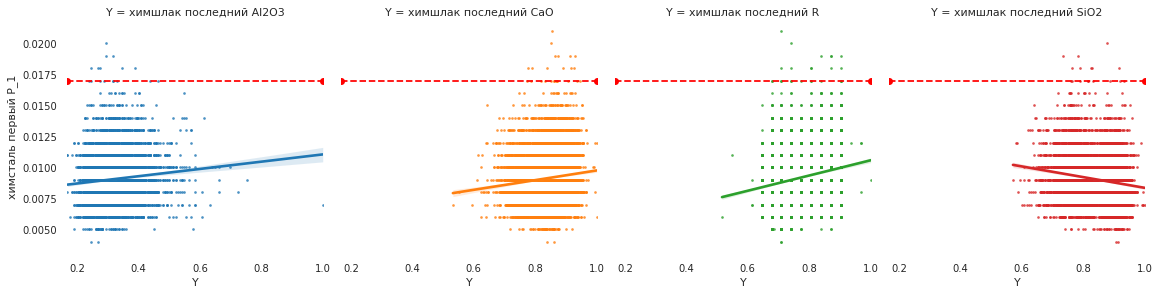

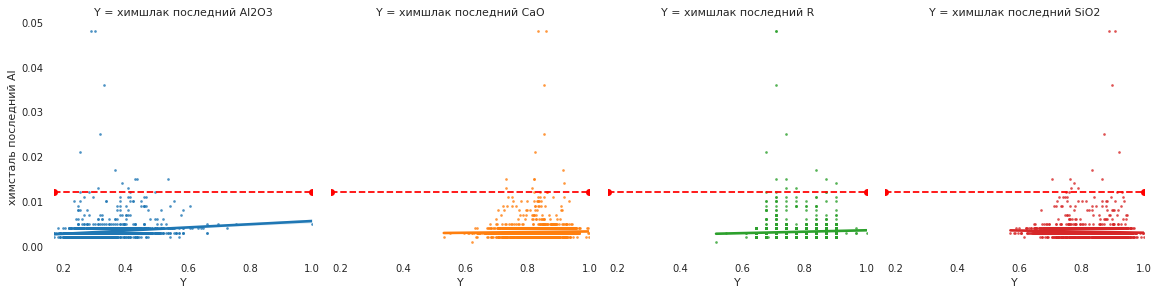

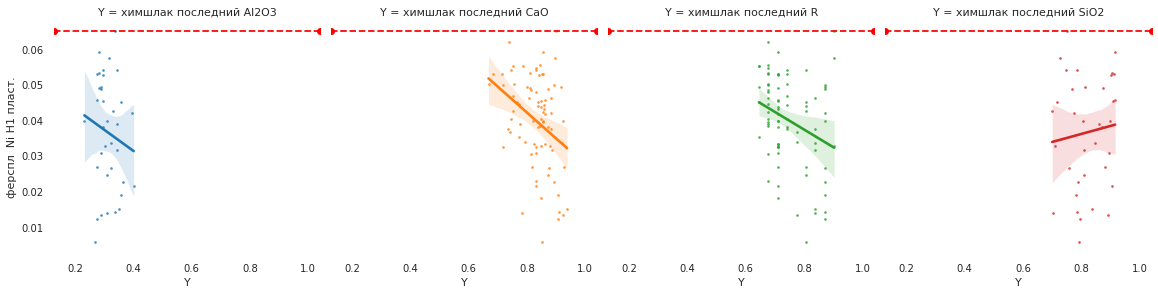

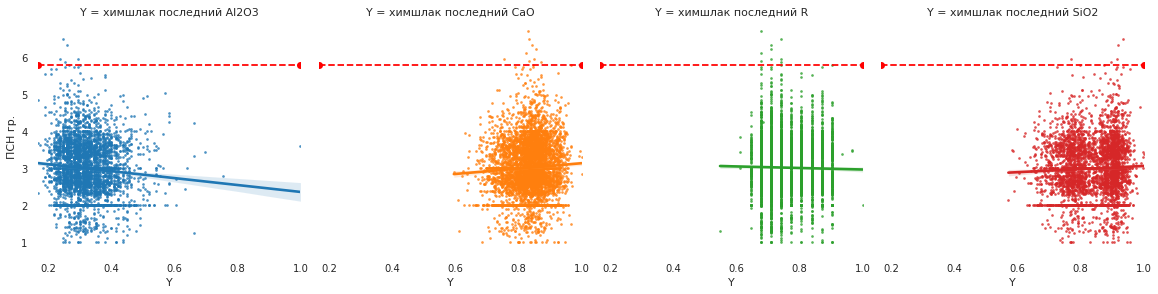

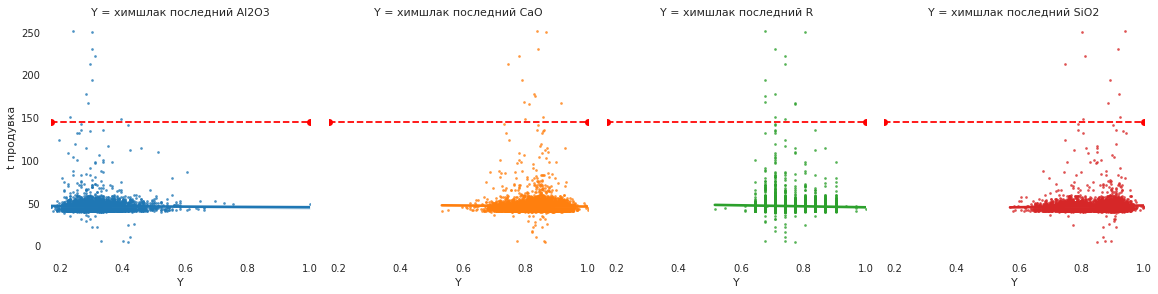

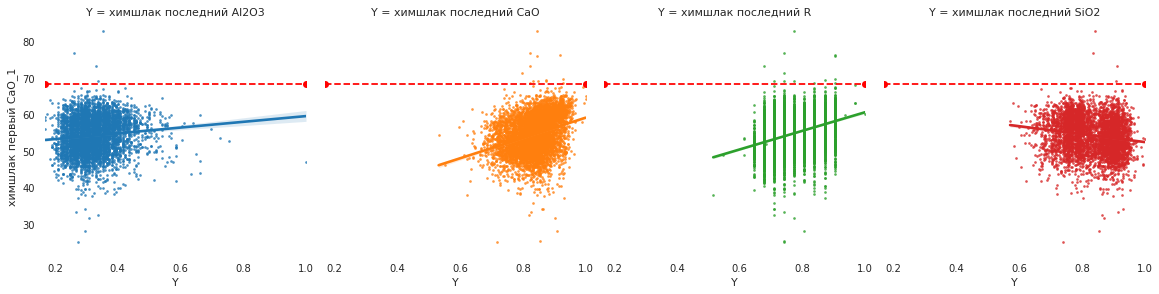

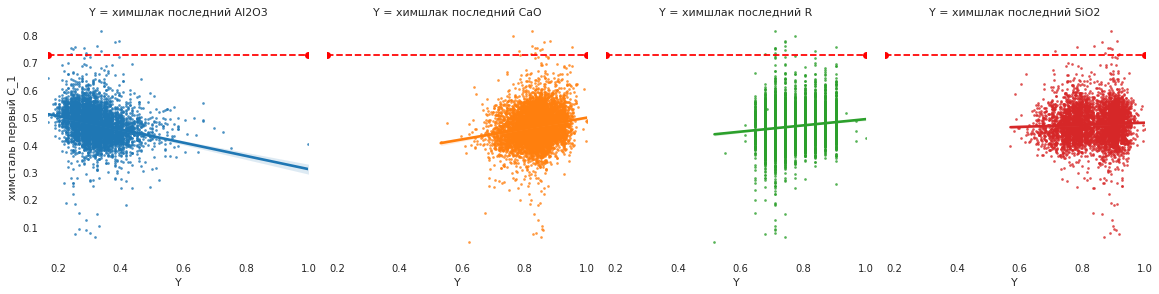

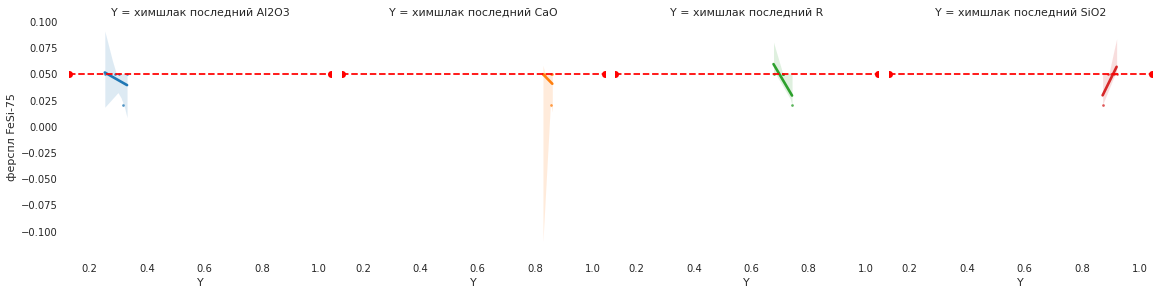

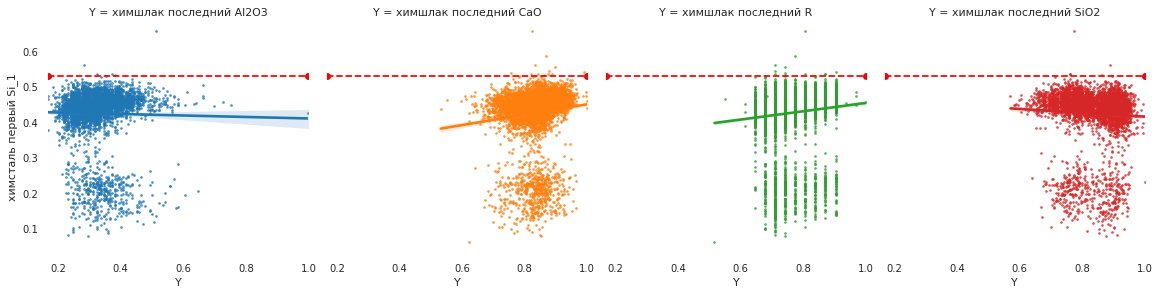

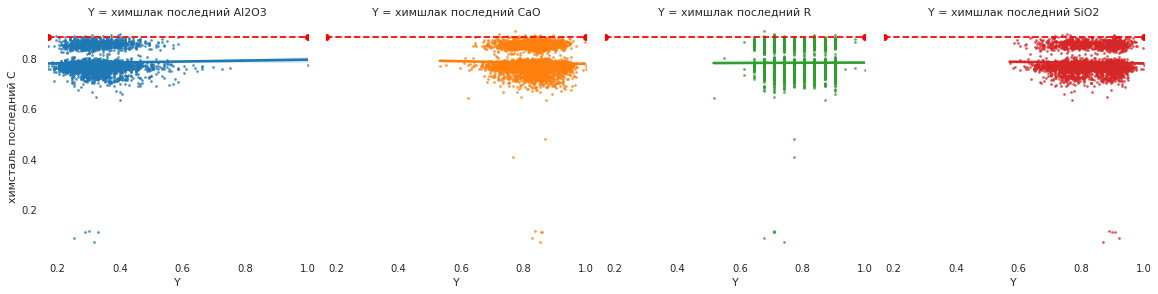

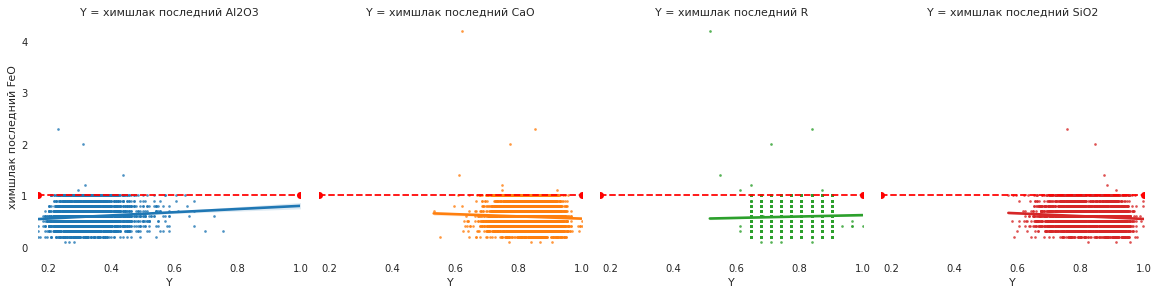

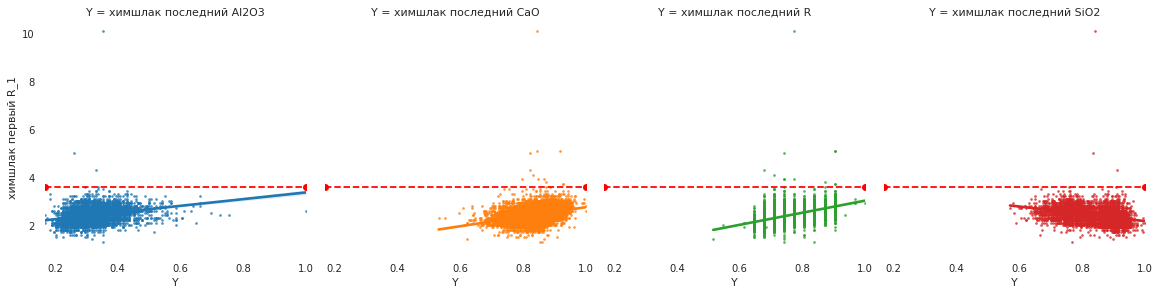

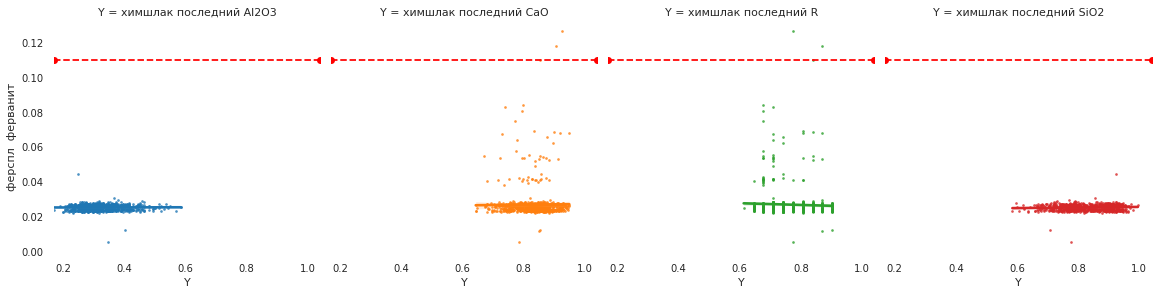

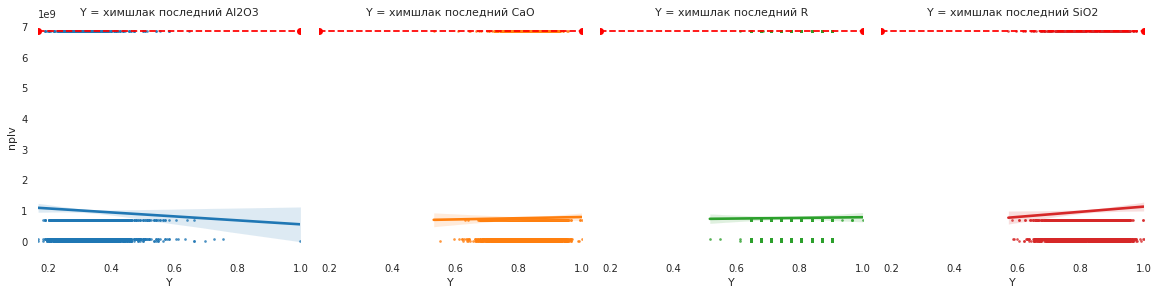

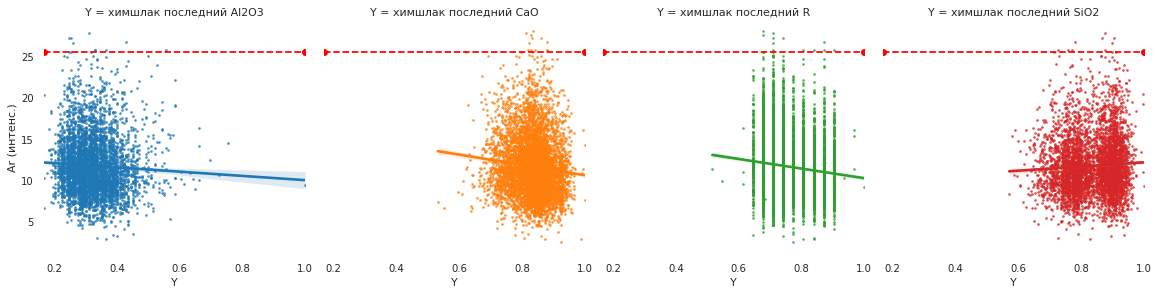

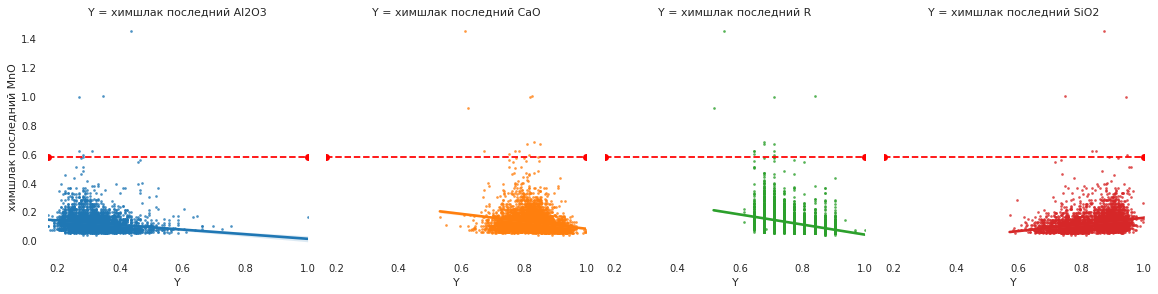

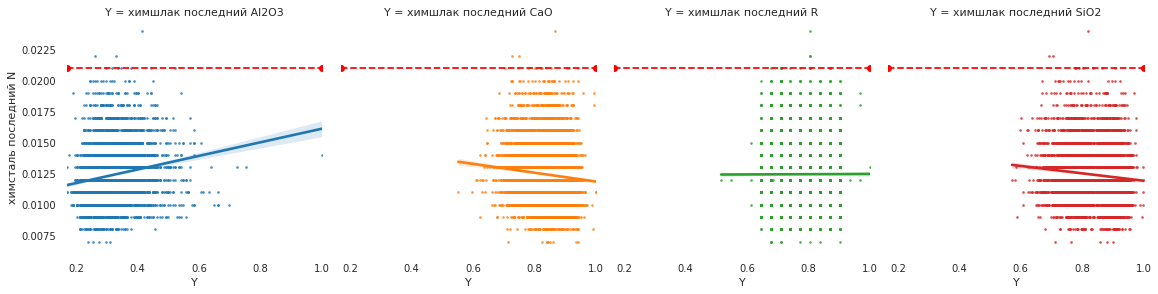

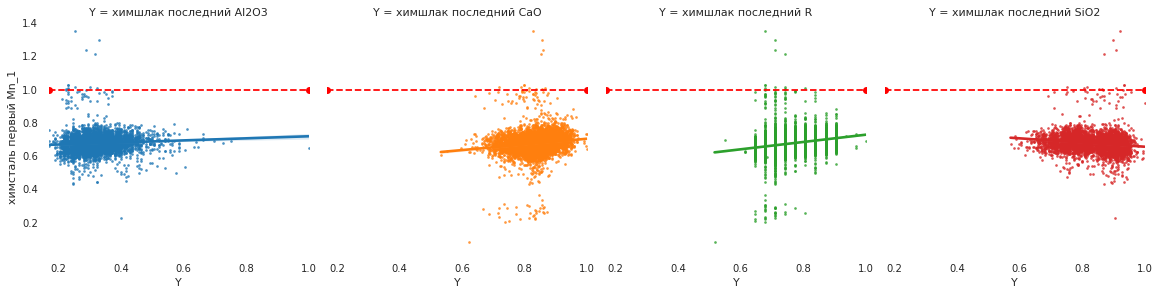

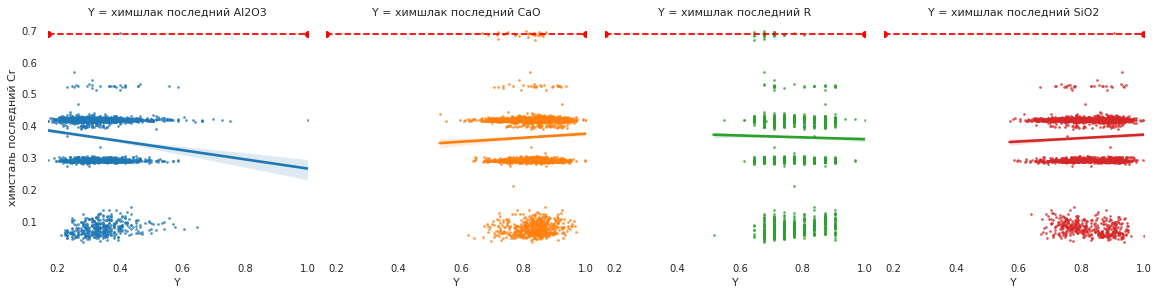

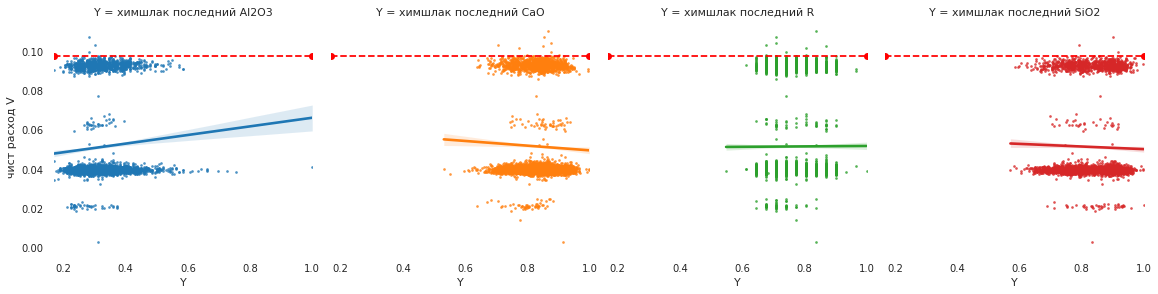

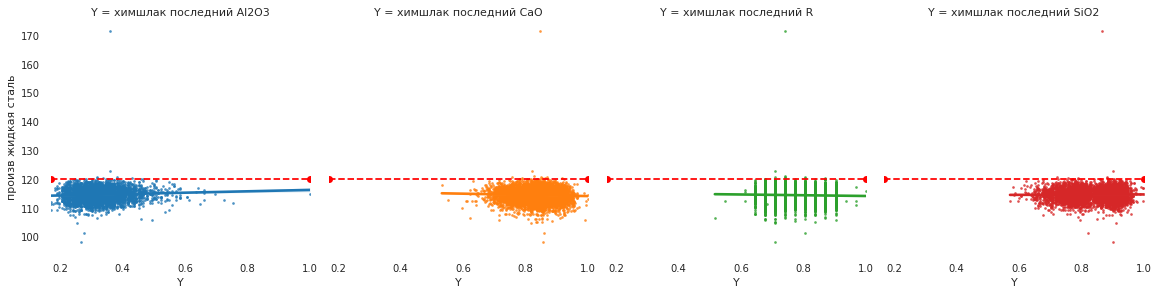

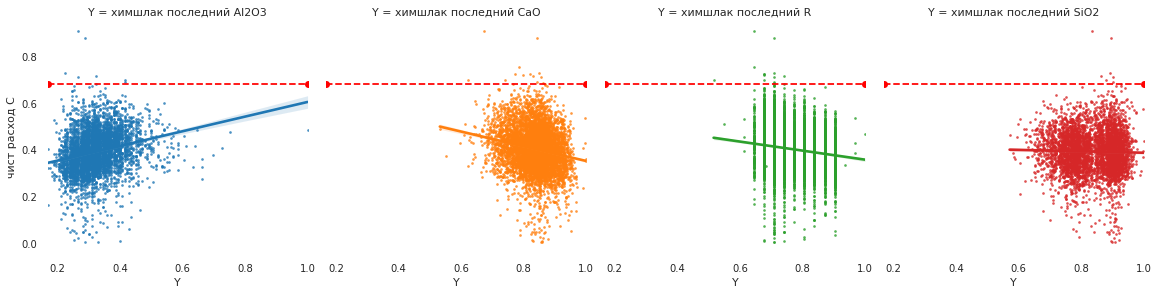

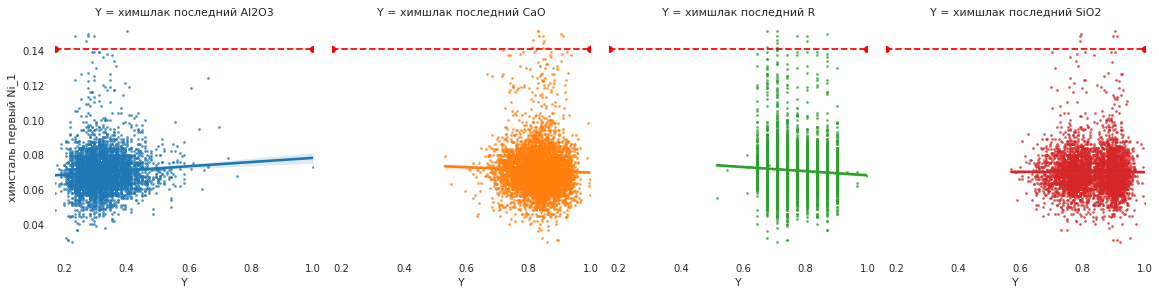

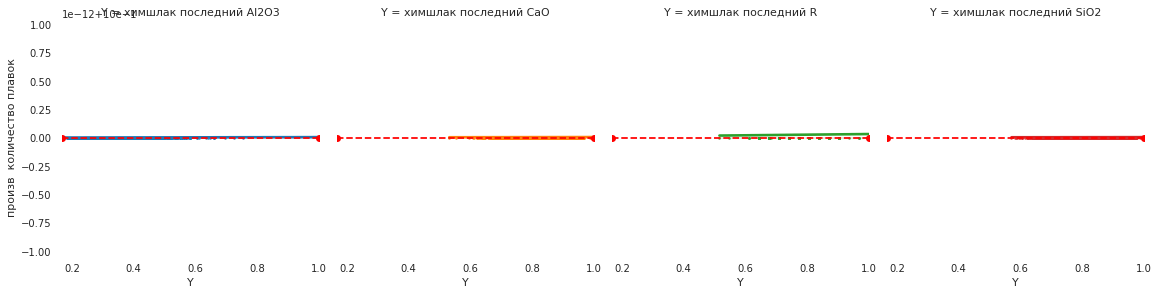

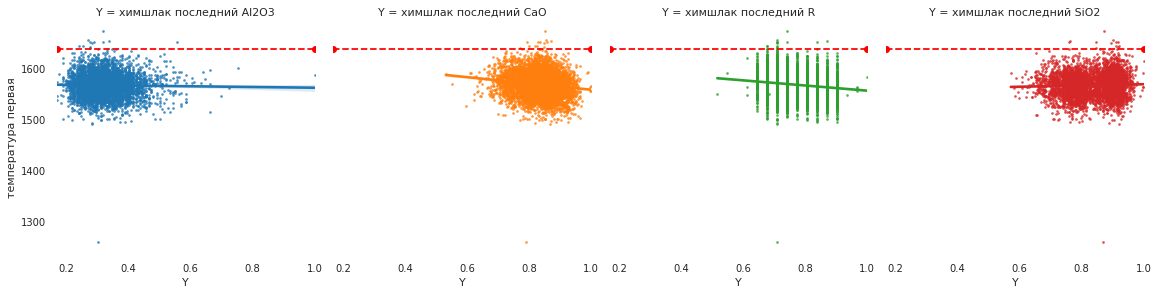

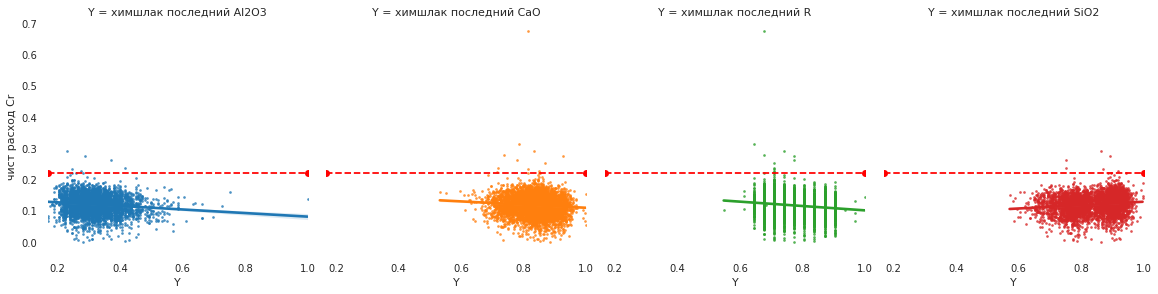

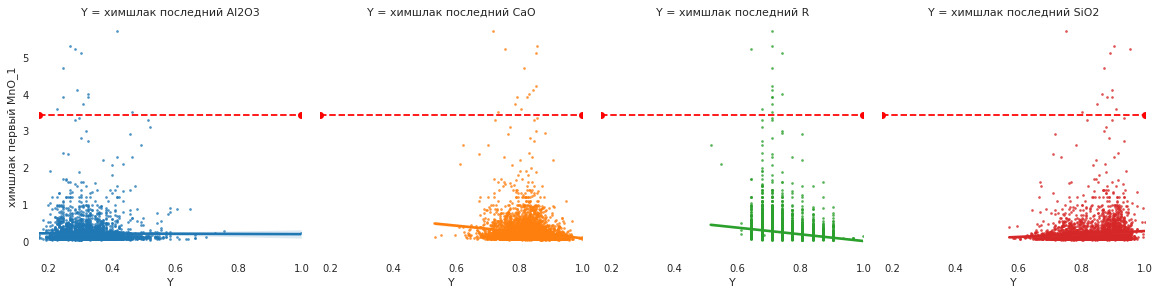

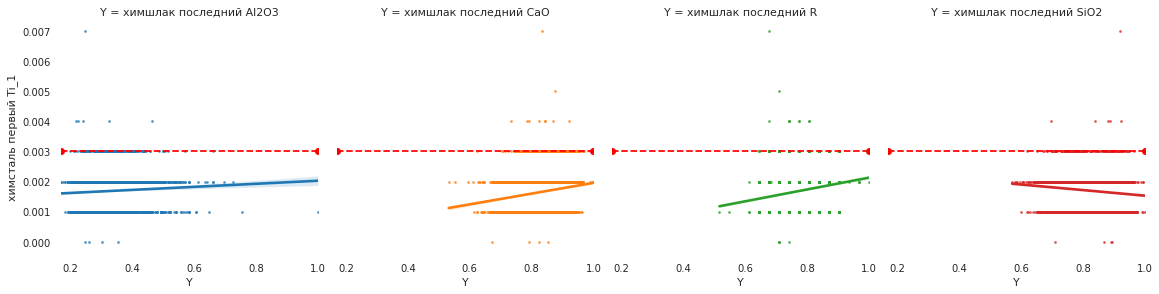

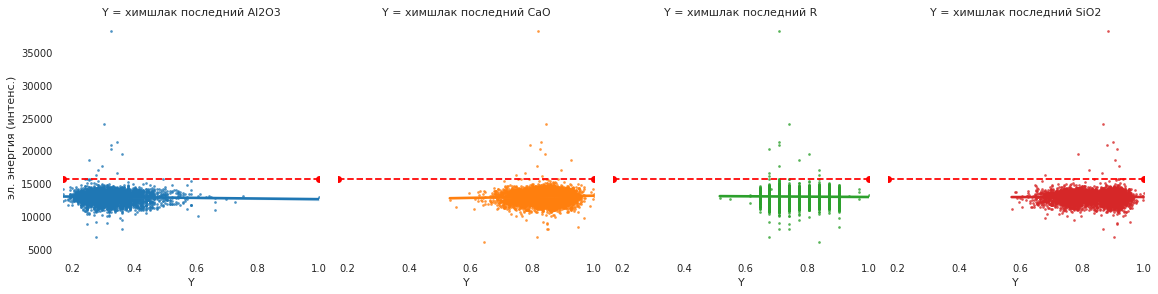

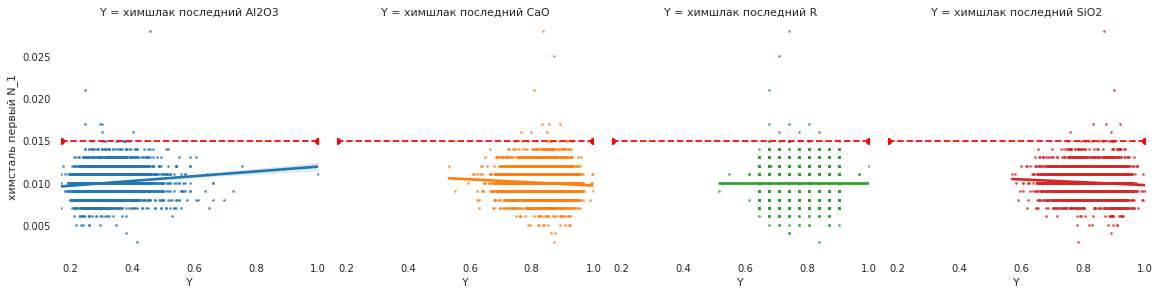

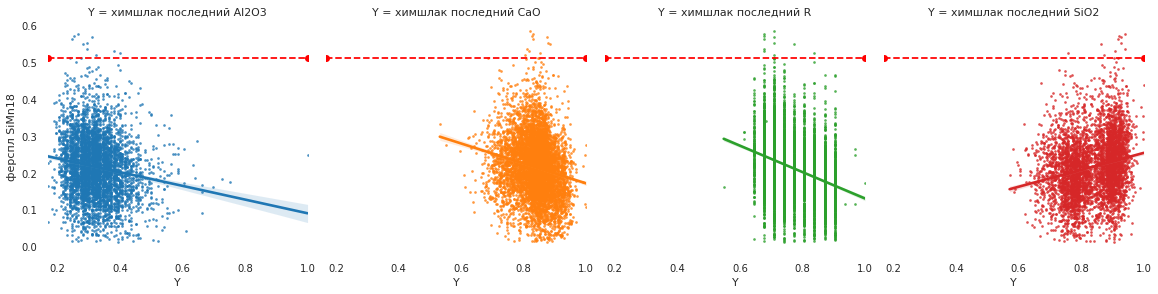

In [18]:
# Вывод локально созраненных графиков
import os
from IPython.display import Image 
for img_naim in os.listdir(graf_path):
    pil_img = Image(filename= graf_path + '/' + img_naim)
    display(pil_img)

## Подготовка данных к обучению

In [19]:
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor

In [20]:
def cat_to_num(df):
  # df['nplv'] = df['nplv'].apply(lambda x: ''.join([c for c in x.replace('?', '0') if c.isdigit()])).astype('int64')
  # df['nplv'] = normalize(df[['nplv']])
  df.drop('nplv', axis=1, inplace=True)
  columns_float = df.drop(['DT', 'МАРКА', 'ПРОФИЛЬ'], axis=1).columns.values
  df.loc[:, columns_float] =  df.loc[:, columns_float].replace(',', '.', regex=True).astype('float64')
  return df

In [21]:
def one_hot(data, dum_col):
    dum = pd.get_dummies(data.loc[:, dum_col])
    data = pd.concat([data, dum], axis=1, join="inner")
    data.drop(labels=dum_col, axis=1, inplace=True)
    return data

dum_col = ['произв количество обработок',
           'произв  количество плавок',
           'произв количество плавок (цел)',
           'сыпуч кварцит',
           'сыпуч  кокс. мелочь (сух.)',
           'ферспл CaC2',
           'ферспл FeSi-75',
           'химсталь первый Al_1',
           'химсталь первый Ti_1',
           'химсталь последний Ti',
           'ПРОФИЛЬ']

In [22]:
def data_preprocessing(df):
    df = cat_to_num(df[df.МАРКА == 'Э76ХФ']).fillna(0)
    df = one_hot(df, dum_col)
    df.drop(labels=['DT', 'МАРКА'], axis=1, inplace=True)
    return df

y_columns = ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']

# Loading data for prediction

In [23]:
pd.options.mode.chained_assignment = None  # default='warn'     
# не нашёл из-за чего варнинг

df = pd.read_csv(data_path + '/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df = drop_nan_rows(df)# Удаление пустых строк ухудшило, результат, но это логчное последствие
df = data_preprocessing(df)

In [24]:
X = df.drop(y_columns, axis=1)
y = df[y_columns]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=13, shuffle=True)

## Изучение влияния папраметра образки на результаты предсказаний

In [26]:
# Обрезка выбросов по квантили 0.998
def trimming_outliers(df, threshold):
    df = df.copy()
    for clo in df:
        df[clo][df[clo] > df[clo].quantile(threshold)] = df[clo].quantile(threshold)
    return df

Наилучший результат при обрезке по квантили:0.8530612244897959



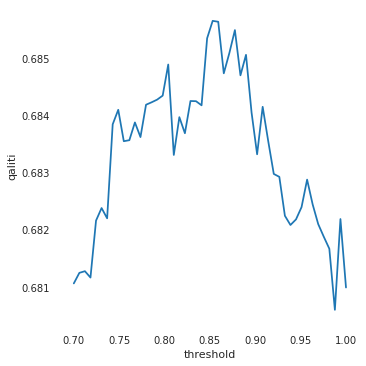

In [27]:
from sklearn.linear_model import LinearRegression
df_threshold_qaliti = pd.DataFrame()
for index, quantile_top in enumerate(np.linspace(0.7,1, 50)):
    reg = LinearRegression().fit(trimming_outliers(X_train, quantile_top), y_train)
    df_threshold_qaliti.loc[index, 'threshold'] = quantile_top
    df_threshold_qaliti.loc[index, 'qaliti'] = reg.score(trimming_outliers(X_test, quantile_top), y_test)
    

print(f"""Наилучший результат при обрезке по квантили:{
            df_threshold_qaliti.loc[df_threshold_qaliti.qaliti.idxmax()]['threshold']
                                                        }\n""")
sns.relplot(data=df_threshold_qaliti, x= 'threshold', y="qaliti", kind="line")

In [28]:
# Порог для обрезки выбрасов
# Определнный визуально
threshold = 0.88

In [29]:
# Обрезка X
X_train, X_test = [trimming_outliers(X, 0.855) for X in (X_train, X_test)]

## Predict

In [30]:
scaler = MinMaxScaler()
names = X_train.columns
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=names)

standart_scaler = StandardScaler()
names = X_train.columns
standart_X_train = standart_scaler.fit_transform(X_train)
standart_X_train = pd.DataFrame(standart_X_train, columns=names)

normalized_X_train = pd.DataFrame(normalize(X_train, axis=0), columns=names)

In [31]:
# Проврерка Explained_variance_score
def evs(reg):
  pred = reg.predict(np.array(X_test))
  print(f"Explained_variance_score: {round(explained_variance_score(y_test, pred) * 100, 2)}%")
  

In [32]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
evs(reg)

reg = LinearRegression()
cv_score = cross_val_score(reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(X_train, y_train).predict(X_test), y_test)

Explained_variance_score: 68.57%
[-3.33954855 -3.48003595 -3.74732915 -3.78593755 -3.43362236] 
mean cv score: -3.5572947125189165


3.3632435039084845

In [33]:
# надо по подбирать под разные таргеты разные алгоритмы, вдруг прокатит
# ещё можно попробовать предсказывать какую-нибудь колонку, на которой ошибка маленькая,
# и стакать её с другими признаками, потом делать по этому предикт
reg = LinearRegression()
for col in y_train.columns.values:
  print(mean_squared_error(reg.fit(X_train, y_train[col]).predict(X_test), y_test[col]))

0.506062029828015
9.658899007715014
0.022625964741152763
3.265387013348963


In [34]:
reg = LinearRegression()
cv_score = cross_val_score(reg, standart_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

[-3.33954855 -3.48003595 -3.74732915 -3.78593755 -3.43349821] 
mean cv score: -3.5572698824988023


3.3632435039078303

In [35]:
reg = LinearRegression()
cv_score = cross_val_score(reg, scaled_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(scaled_X_train, y_train).predict(X_test), y_test)

[-3.33954855 -3.48003595 -3.74732915 -3.78593755 -3.43362236] 
mean cv score: -3.5572947125172716


68999280.85210976

In [36]:
reg = LinearRegression()
cv_score = cross_val_score(reg, normalized_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(normalized_X_train, y_train).predict(normalize(X_test, axis=0)), y_test)

[-3.33954855 -3.48070912 -3.74732915 -3.78892646 -3.43362236] 
mean cv score: -3.558027127778639


118.35631792816437

In [37]:
reg = LinearRegression(normalize=True)
cv_score = cross_val_score(reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(X_train, y_train).predict(X_test), y_test)

[-3.33954855 -3.48003595 -3.74732915 -3.78618269 -3.43362236] 
mean cv score: -3.557343740516758


3.363243503907833

In [38]:
from sklearn.linear_model import ElasticNet, MultiTaskElasticNetCV
reg = ElasticNet(random_state=0)
cv_score = cross_val_score(reg, standart_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

[-6.19538198 -6.42270356 -6.24022569 -6.26231595 -6.0989224 ] 
mean cv score: -6.243909915899201


6.246019291658404

In [39]:
reg = MultiTaskElasticNetCV(cv=5, random_state=0)
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

3.390176048688838

In [40]:
# Ridge
from sklearn.linear_model import Ridge

reg = MultiOutputRegressor(Ridge(random_state=42))
cv_score = cross_val_score(reg, standart_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

[-3.30167722 -3.48092724 -3.74621135 -3.78272036 -3.43151252] 
mean cv score: -3.5486097391212263


3.3604156295381165

In [41]:
import xgboost as xgb

xgbr = MultiOutputRegressor(xgb.XGBRegressor(verbosity=0)).fit(X_train, y_train)
cross_val_score(xgbr, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean()

-3.7849478371186853

In [42]:
# хорошо бы использовать встроенную в catboost обработку категориальных
from catboost import CatBoostRegressor
cbr = MultiOutputRegressor(CatBoostRegressor(verbose=False, random_seed=42))
print('mean cv score:', cross_val_score(cbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
print('test score:', mean_squared_error(cbr.fit(X_train, y_train).predict(X_test), y_test).mean())

mean cv score: -3.270388471910617
test score: 3.144697611595949
